In [14]:
from Pruebas import *

In [15]:
# load a clean dataset
def load_clean_sentences(filename):
	return load(open(filename, 'rb'))

# save a list of clean sentences to file
def save_clean_data(sentences, filename):
	dump(sentences, open(filename, 'wb'))
	print('Saved: %s' % filename)

# load dataset
raw_dataset = load_clean_sentences('spanish-english-clean-3.txt')
dataset_number_of_samples = raw_dataset.shape[0]
print(dataset_number_of_samples)

# reduce dataset size
n_sentences = 20000

# random shuffle
shuffle(raw_dataset)

dataset = raw_dataset[:n_sentences, :]

# split into train/test
print(dataset.shape[0])

index_80=int(dataset.shape[0]*0.8)
train, test = dataset[:index_80], dataset[index_80:]
print(len(train),len(test))
# save
save_clean_data(dataset, 'dataset/english-spanish-both-VF-20000.txt')
save_clean_data(train, 'dataset/english-spanish-train-VF-20000.txt')
save_clean_data(test, 'dataset/english-spanish-test-VF-20000.txt')

117788
20000
16000 4000
Saved: dataset/english-spanish-both-VF-20000.txt
Saved: dataset/english-spanish-train-VF-20000.txt
Saved: dataset/english-spanish-test-VF-20000.txt


In [20]:
# caro aquiiiiiiiiiiiiiiiiii -----------------------------------------
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-VF-80000.txt', 'dataset/english-spanish-train-VF-80000.txt','dataset/english-spanish-test-VF-80000.txt'
# model_save_file_name='Models/best_model-VF-50000-2.h5'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = load_model('best_model-VF-80000.h5')

evaluate_model(model,testX,testY,eng_tokenizer)

11234 20955 47 49
(64000, 47) (64000, 49) (16000, 47) (16000, 49)
(64000, 47) (64000, 49) (16000, 47) (16000, 49)


ValueError: too many values to unpack (expected 2)

In [37]:
from pickle import load
from numpy import argmax
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import load_model
from nltk.translate.bleu_score import corpus_bleu
from fit_model import *
 
# cargar un conjunto de datos limpio
def load_clean_sentences(filename):
    return load(open(filename,'rb'))
 
# instalar un tokenizador
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer
 
# duración máxima de la frase
def max_length(lines):
    return max(len(line.split()) for line in lines)
 
# codificar y secuencias de pads
def encode_sequences(tokenizer, length, lines):
    # integer encode sequences
    X = tokenizer.texts_to_sequences(lines)
    # secuencias de pads con valores 0
    X = pad_sequences(X, maxlen=length, padding='post')
    return X
 
# asignar un número entero a una palabra
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None
 
# generar la secuencia de origen del objetivo
def predict_sequence(model, tokenizer, source):
    prediction = model.predict(source, verbose=0)[0]
    integers = [argmax(vector) for vector in prediction]
    target = list()
    for i in integers:
        word = word_for_id(i, tokenizer)
        if word is None:
            break
        target.append(word)
    return' '.join(target)
 
# evaluar la habilidad del modelo
def evaluate_model_2(model, sources, raw_dataset,tokenizer):
    actual, predicted = list(), list()
    for i, source in enumerate(sources):
        source = source.reshape((1, source.shape[0]))
        translation = predict_sequence(model, tokenizer, source)
        raw_src,raw_target= raw_dataset[i]
        # if i < 10:
        print('src=[%s], target=[%s], predicted=[%s]'% (raw_src, raw_target, translation))
        actual.append(raw_target.split())
        predicted.append(translation.split())
            # Calcular la puntuación BLEU
        # print('BLEU-1: %f'% corpus_bleu(actual, predicted, weights=(1.0, 0, 0, 0)))
        # print('BLEU-2: %f'% corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0)))
        # print('BLEU-3: %f'% corpus_bleu(actual, predicted, weights=(0.3, 0.3, 0.3, 0)))
        # print('BLEU-4: %f'% corpus_bleu(actual, predicted, weights=(0.25, 0.25, 0.25,0.25)))


In [38]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-VF-80000.txt', 'dataset/english-spanish-train-VF-80000.txt','dataset/english-spanish-test-VF-80000.txt'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)


eng_tokenizer = create_tokenizer(dataset[:,0] )
eng_vocab_size = len(eng_tokenizer.word_index) + 1
eng_length = max_length(dataset[:,0])
print(f"eng_length:  {eng_length}") # eng_length:  47


spa_tokenizer = create_tokenizer(dataset[:,1] )
spa_vocab_size = len(spa_tokenizer.word_index) + 1
spa_length = max_length(dataset[:,1])
print(f"spa_length:  {spa_length}") # spa_length:  49

eng_length:  47
spa_length:  49


In [ ]:
# caro aquiiiiiiiiiiiiiiiiii -----------------------------------------
testX = encode_sequences(eng_tokenizer,eng_length,test[:,0] )

model = load_model('best_model-VF-80000.h5')

evaluate_model_2(model,testX,test,spa_tokenizer)

src=[i have eaten a lot this week], target=[he comido mucho esta semana], predicted=[he haber comido semana]
src=[you should go home now], target=[ahora deberias irte a casa], predicted=[ahora deberias ir a casa]
src=[would you promise to keep in touch with me], target=[me prometerias seguir en contacto conmigo], predicted=[me que que conmigo conmigo conmigo]
src=[i apologize for that], target=[pido disculpas por eso], predicted=[me pido por eso eso]
src=[he wet the towel with water], target=[mojo la toalla con agua], predicted=[el la la la agua agua]
src=[are you seriously thinking about getting involved], target=[estas pensando seriamente en involucrarte], predicted=[estas pensando seriamente en involucrarte involucrarte]
src=[i am so tired that i study], target=[estoy tan cansado que no puedo estudiar], predicted=[estoy cansado que que no estudiar]
src=[i sleep well], target=[no dormi bien], predicted=[yo me bien bien]
src=[who invited you guys], target=[quien los invito], predicted

src=[may i do it right now], target=[lo puedo hacer enseguida], predicted=[puedo hacerlo hacerlo]
src=[tom even scared], target=[tom ni siquiera estaba asustado], predicted=[tom no siquiera ni]
src=[tom was about to leave when mary knocked on the door], target=[tom estaba a punto de irse cuando maria golpeo a la puerta], predicted=[tom estaba punto punto a a a a a a]
src=[she took it off], target=[se lo quito], predicted=[ella se hizo]
src=[the people in the other room are speaking french], target=[la gente en la otra habitacion esta hablando frances], predicted=[la gente en la la habla frances frances]
src=[she sent me a long letter], target=[ella me envio una larga carta], predicted=[ella me tomo carta carta]
src=[i can do it alone], target=[puedo hacerlo sola], predicted=[puedo hacerlo solo solo]
src=[no sooner had he struck the match than the bomb exploded], target=[apenas el prendio el fosforo la bomba estallo], predicted=[no usa la la la la la al al]
src=[it was apparent that he 

src=[he got up early this morning], target=[el se levanto temprano esta manana], predicted=[el se se manana manana]
src=[many employees had to be laid off due to budget cutbacks], target=[muchos empleados tuvieron que ser despedidos debido a recortes presupuestarios], predicted=[muchos muchos deben a a a a]
src=[he knew it all along], target=[el lo sabia desde un comienzo], predicted=[el sabia que lo el]
src=[is the bank far from here], target=[el banco esta lejos de aqui], predicted=[el el esta de de]
src=[are they here], target=[estan ellos aqui], predicted=[estan aqui]
src=[perhaps you have misunderstood the aim of our project], target=[puede que hayas entendido mal el objetivo de nuestro proyecto], predicted=[debes que el el el el vida]
src=[tom is on hold], target=[tom esta esperando al telefono], predicted=[tom esta esta]
src=[he got up earlier than usual], target=[se levanto antes que de costumbre], predicted=[el se mas mas mas que que]
src=[no one will recognize her in this mas

src=[the tower leaned slightly to the left], target=[la torre se inclinaba ligeramente hacia la izquierda], predicted=[el carretera se se para para para a la la]
src=[had enough of tom and mary], target=[ya me he hartado de tom y mary], predicted=[tuve tuve tenido de tom tom tom mary]
src=[tom had his ear pressed to the door trying to hear what was going on in the next room], target=[tom tenia la oreja pegada en la puerta tratando de oir lo que estaba pasando en la habitacion de al lado], predicted=[tom estaba de de de pegada de de de de de de en en en en la la]
src=[innocent], target=[soy inocente], predicted=[soy inocente]
src=[does your country have nuclear weapons], target=[tu pais tiene armas nucleares], predicted=[tu brazos tiene muchos]
src=[the investigation is still active], target=[la investigacion esta aun activa], predicted=[la aun esta esta]
src=[i sometimes talk to my neighbor across the fence], target=[algunas veces hablo con mi vecino frente a la cerca], predicted=[a a 

src=[why we talk about something else], target=[por que no hablamos de otra cosa], predicted=[por que hablamos hablamos hablamos hablamos]
src=[nothing will be gained by getting angry], target=[enojandose no arreglara nada], predicted=[no de de de para]
src=[i just lost my best friend in a traffic accident], target=[acabo de perder a mi mejor amigo en un accidente de transito], predicted=[me mi mi mi mi mi mi mi mi accidente]
src=[there may be life on the moons of jupiter], target=[puede que haya vida en las lunas de jupiter], predicted=[puede puede la vida vida vida vida vida vida vida]
src=[english is a universal language and is used all over the world], target=[el ingles es un idioma universal y es usado en todo el mundo], predicted=[el ingles es un idioma idioma en todos mundo mundo mundo mundo mundo]
src=[tom answered all of questions], target=[tom respondio todas las preguntas de mary], predicted=[tom no dejo todas las]
src=[both idiots], target=[somos dos idiotas], predicted=[es

src=[tom is going to write a letter to mary], target=[tom le va a escribir una carta a mary], predicted=[tom le a a una a a]
src=[a fox], target=[ella es una zorra], predicted=[es un un]
src=[tom felt cold], target=[tom siente frio], predicted=[tom se frio]
src=[the skyscraper was built on a solid foundation], target=[el rascacielos fue construido sobre una base solida], predicted=[el resultado fue fue un un un]
src=[he looked at me with a strange expression], target=[me miro con una expresion extrana], predicted=[el saludo saludo con con]
src=[he was dismissed by the boss of the factory], target=[fue despedido por el jefe de la fabrica], predicted=[el fue a por por de la la]
src=[read it again], target=[leelo nuevamente], predicted=[leelo leelo nuevo]
src=[going to get in trouble for that], target=[nos vamos a meter en problemas por eso], predicted=[voy a a meter meter con]
src=[what does it actually mean], target=[que significa en realidad], predicted=[que que es]
src=[very early], t

src=[we have a lot of time], target=[tenemos un monton de tiempo], predicted=[tenemos mucho mucho]
src=[i help feeling sorry for the girl], target=[no puedo evitar sentir lastima por esa chica], predicted=[me puedo evitar a a a la]
src=[tom want you to discover the truth], target=[tom no quiere que descubras la verdad], predicted=[tom no quiere quiere la la verdad]
src=[she may or may not agree with us], target=[ella puede estar o no estar de acuerdo con nosotros], predicted=[puede puede puede se de de con con]
src=[my fate is in your hands], target=[mi destino esta en tus manos], predicted=[este zoo esta en sus izquierda]
src=[he leaves for tokyo tomorrow], target=[el parte para tokio manana], predicted=[el manana a tokio tokio]
src=[you believe everything tom tells you], target=[no deberias creer todo lo que tom te dice], predicted=[no te creas que que diga diga diga]
src=[eight years ago we were in the early stages of what would become the worst economic crisis of our lifetimes], ta

src=[tom wondered why his wife left him], target=[tomas se preguntaba por que le abandono su mujer], predicted=[tom se pregunto por que se se su]
src=[what would you advise me to do], target=[que me aconseja usted hacer], predicted=[que que que]
src=[i found the subject fascinating], target=[yo encuentro fascinante el tema], predicted=[encontre el el oro]
src=[they drained their glasses], target=[apuraron las copas], predicted=[ellos se sus sus]
src=[you get in touch with tom], target=[puedes contactar con tom], predicted=[no puedes contacto contacto contacto]
src=[she gave me a present], target=[ella me dio un regalo], predicted=[ella me dio un regalo]
src=[i thought tom would be nervous but he was very relaxed], target=[pense que tom estaria nervioso pero el estaba muy relajado], predicted=[pense que tom estaba estaba pero pero muy muy]
src=[a bit busy at the moment can you hang on a minute], target=[estamos un poco ocupados por el momento podes esperar un minuto], predicted=[en un u

src=[i am studying kanji], target=[estoy estudiando kanji], predicted=[estoy estudiando estudiando]
src=[i forgot the book], target=[yo olvide el libro], predicted=[olvide el libro]
src=[mary has received several prizes for her poetry], target=[mary ha recibido muchos premios por su poesia], predicted=[mary tiene su para para sus]
src=[would you like to have dinner with me], target=[te gustaria cenar conmigo], predicted=[queres que conmigo cenar cenar]
src=[i showed him boss], target=[le mostre quien es el jefe], predicted=[me le el el]
src=[he is able to speak japanese], target=[el es capaz de hablar japones], predicted=[el es capaz de]
src=[my brother is a vet], target=[mi hermano es veterinario], predicted=[mi hermano es un]
src=[it is very cold today], target=[hoy hace mucho frio], predicted=[hoy hace frio frio]
src=[tom watched mary disappear into the darkness], target=[tom vio a maria desaparecer en la oscuridad], predicted=[tom le a mary la la la la]
src=[we knew that], target=[

src=[rabbits have long ears and short tails], target=[un conejo tiene orejas largas y cola corta], predicted=[los conejos tienen tienen alargadas y colas colas]
src=[tom is twin brother], target=[tom es el hermano gemelo de mary], predicted=[tom es su hermano de]
src=[not crying], target=[no estoy llorando], predicted=[no estoy llorando]
src=[i hope it too much trouble], target=[espero que no haya sido demasiado problema], predicted=[espero que no demasiado demasiado]
src=[the old man looks sad], target=[el anciano parece triste], predicted=[el anciano se veia]
src=[you do nothing else but eat], target=[no haces nada mas que comer], predicted=[no no mas mas mas mas mas]
src=[your bike is better than mine], target=[su bicicleta es mejor que la mia], predicted=[tu bicicleta es mas que que mia]
src=[that of course does not mean that they are right], target=[por supuesto eso no quiere decir que ellos tengan razon], predicted=[asi que asi que que no asi asi]
src=[everybody loves her], targe

src=[i need your permission], target=[no necesito tu permiso], predicted=[necesito necesito tu]
src=[i help tom with that], target=[no puedo ayudar a tom con eso], predicted=[no puedo evitar a con eso]
src=[the men go to work], target=[los hombres van a trabajar], predicted=[los hombres hombres a]
src=[all the boys were looking at tom], target=[todos los muchachos estaban mirando a tom], predicted=[todos chicos chicos chicos estaban]
src=[all over now], target=[ya todo termino], predicted=[todos estan todo]
src=[learning french], target=[estamos aprendiendo frances], predicted=[estoy aprendiendo frances frances]
src=[i am eighteen years old], target=[tengo dieciocho anos], predicted=[tengo dieciseis anos anos]
src=[it is interesting that no one noticed that mistake], target=[es interesante que nadie se diera cuenta del error], predicted=[es es un que que no no verdadero]
src=[that boy is really shy], target=[ese chico es realmente timido], predicted=[ese chico es muy joven]
src=[tom wa

src=[we met her by accident], target=[nos encontramos con ella por casualidad], predicted=[nos casualidad en en accidente]
src=[tom first met mary when they were in high school], target=[tom conocio a mary cuando iban en ensenanza media], predicted=[tom conocio a mary cuando cuando en en en]
src=[the family ate dinner together], target=[la familia ceno reunida], predicted=[la familia familia de]
src=[go have some fun], target=[ve y diviertete], predicted=[no de divertido divertido]
src=[this is not true], target=[esto no es cierto], predicted=[esto no es verdad]
src=[please leave my things as they are], target=[por favor deja mis cosas como estan], predicted=[por favor favor las cosas cosas cosas]
src=[that sounds very tempting], target=[eso suena muy tentador], predicted=[eso suena muy muy]
src=[she likes oranges she], target=[le gustan las naranjas verdad], predicted=[ella ella le las las]
src=[there are many words with meanings i know], target=[hay muchas palabras cuyo significado d

src=[he say in which year he was born], target=[el no dijo en que ano nacio], predicted=[el lo que en en en que que]
src=[tom fumbled in his pocket for the keys], target=[tom rebusco en su bolsillo las llaves], predicted=[tom guarda guarda en en en club en club club]
src=[where have you been this week], target=[donde has estado esta semana], predicted=[donde donde esta semana semana]
src=[they say that he is very rich], target=[dicen que es muy rico], predicted=[dicen que que es es rica]
src=[i believe that to be true], target=[no creo que eso sea cierto], predicted=[no que que que verdad verdad]
src=[do not oversleep tomorrow morning], target=[no te quedes dormido manana en la manana], predicted=[manana manana manana manana manana manana manana manana]
src=[rural life appeals to me very much], target=[la vida en el campo me atrae mucho], predicted=[la vida de la la la es]
src=[i really want to go to boston with tom], target=[yo sinceramente no quiero ir a boston con tom], predicted=[s

src=[goners], target=[estamos desahuciados], predicted=[estoy es]
src=[doctors removed the bullet], target=[los doctores extrajeron la bala], predicted=[los los se los]
src=[can you answer this], target=[puedes responder a esto], predicted=[podes responder esto]
src=[tom is pretty good at playing piano by ear], target=[tom es muy bueno tocando piano de oido], predicted=[tom es muy bueno tocando tocando la]
src=[it was a lucky guess], target=[fue un golpe de suerte], predicted=[fue una suerte suerte que]
src=[not broken], target=[no esta roto], predicted=[no esta roto]
src=[i want time instead of money], target=[yo deseo tiempo en lugar de dinero], predicted=[quiero quiero en en en en en en]
src=[all i want to do is sit here], target=[todo lo que quiero hacer es sentarme aca], predicted=[todo lo que quiero quiero quiero aqui]
src=[the entire nation was glad at the news], target=[la nacion entera estaba alegre por la noticia], predicted=[la la se estaba la en en en]
src=[i thought tom wa

src=[the pan lid], target=[donde esta la tapa de la sarten], predicted=[el la la la]
src=[tom drank three cups of coffee after dinner no wonder he sleep], target=[tom bebio tres vasos de cafe despues de cenar no me sorprende que no pudiera dormir], predicted=[tom comio comio cafe cafe cafe cafe cafe cafe tomo tomo tomo no no no no no]
src=[is tom dangerous], target=[tom es peligroso], predicted=[tom tom tom]
src=[i hear anything at all], target=[no puedo oir absolutamente nada], predicted=[no no nada nada]
src=[tom go unless mary goes with him], target=[tom no ira a menos que mary vaya con el], predicted=[tom no se ir mary mary a con]
src=[tom said mary was coming over for dinner], target=[tom dijo que mary iba a venir a cenar], predicted=[tom dijo que a a a a cena]
src=[there is little automobile traffic on this road], target=[esta carretera tiene poco trafico de coches], predicted=[hay un en en en en de]
src=[figure seven shows all the parts of the motor], target=[la figura siete mue

src=[she will be the first female japanese astronaut], target=[ella sera la primera mujer japonesa astronauta], predicted=[ella se el el el el]
src=[lemon tea without sugar please], target=[te con limon sin azucar por favor], predicted=[por favor no no poco limon por]
src=[i like her so beautiful], target=[me gusta es tan guapa], predicted=[no gusta gusta es bella]
src=[not any good at math], target=[no soy nada bueno en matematicas], predicted=[no no bueno ni en matematicas matematicas matematicas]
src=[are you awake], target=[estas despierta], predicted=[estas despierto]
src=[who knows what accomplish if given the chance], target=[quien sabe hasta donde llegara si se le da la oportunidad], predicted=[quien se explico que se se la la]
src=[mary is not used to being made fun of], target=[mary no esta acostumbrada a que se rian de ella], predicted=[mary no no acostumbrado acostumbrado ser ser]
src=[it helps], target=[eso ayuda], predicted=[ayuda ayuda]
src=[reading this book], target=[e

src=[take command], target=[toma el control], predicted=[hazte al control control]
src=[better], target=[yo soy mejor], predicted=[es mejor]
src=[the person who opened the door and came in was an utter stranger], target=[la persona que abrio la puerta y entro era un desconocido], predicted=[la la de que la hombre era era era era era hombre hombre]
src=[you were nice], target=[ustedes eran simpaticos], predicted=[fuiste simpatico]
src=[tom wants a new coat], target=[tom quiere un abrigo nuevo], predicted=[tom quiere un un]
src=[this one is full], target=[este esta lleno], predicted=[este esta esta]
src=[tom know where mary has gone], target=[tom no sabe donde ha ido mary], predicted=[tom no sabia donde donde donde ido]
src=[never at home on sundays], target=[nunca estoy en casa los domingos], predicted=[nunca me en los los los domingos]
src=[tom uncorked the wine], target=[tom descorcho el vino], predicted=[tom se vino el vino]
src=[she wanted to go out anyway], target=[de todas formas 

src=[tom lied to mary and she knows it], target=[tom le mintio a mary y ella lo sabe], predicted=[tom le a a a a lo lo]
src=[tom wanted to sit down for a few seconds], target=[tom queria sentarse por unos segundos], predicted=[tom queria que un por unos]
src=[tell me about your first kiss], target=[hablame de tu primer beso], predicted=[dime tu tu tu]
src=[which team is ours], target=[cual es nuestro equipo], predicted=[que es es nuestro]
src=[the baby cried itself to sleep], target=[el bebe lloro hasta dormirse], predicted=[el nino duerme duerme dormir]
src=[i can give you medication for the pain], target=[te puedo dar medicina para el dolor], predicted=[puedo puedo tomar el el]
src=[quit gambling], target=[deja de apostar], predicted=[deja de apuestas]
src=[what causes teeth grinding], target=[que causa el rechinar de dientes], predicted=[que de las las]
src=[when does the post office open], target=[cuando abre la oficina de correos], predicted=[cuando la la oficina de correos]
src=[

src=[how did you get to know her], target=[como la conociste], predicted=[como llegaste conocerla conocerla]
src=[look it up], target=[lo buscare], predicted=[buscalo]
src=[tom has never seen mary smile], target=[tom nunca ha visto sonreir a mary], predicted=[tom nunca que visto visto mary]
src=[never done it like that before], target=[nunca lo habia hecho de esa forma], predicted=[nunca he he antes antes antes antes]
src=[the largest telescope is in the canary islands], target=[el telescopio mas grande del mundo se encuentra en las islas canarias], predicted=[el mayoria de mas mas mas mas mas de de]
src=[definitely not coming], target=[el definitivamente no vendra], predicted=[no no no no]
src=[the boy tried to be a man and not cry], target=[el nino intento ser un hombre y no llorar], predicted=[el hombre era de no no no no no no]
src=[this car is my], target=[este es el auto de mi papa], predicted=[este coche es mi]
src=[are you sure you come with me], target=[estas seguro de que no 

src=[you can have mine], target=[puedes tener el mio], predicted=[puedes puedes mio]
src=[i lost my job on monday], target=[el lunes perdi mi empleo], predicted=[trabajo el trabajo el lunes]
src=[she went on a journey a few days ago], target=[ella se fue de viaje hace algunos dias], predicted=[ella se un un unos un dias]
src=[i go to the barber once a month], target=[voy a la peluqueria una vez por mes], predicted=[voy ir al una vez vez peluquero mes]
src=[have the children eaten yet], target=[los ninos ya han comido], predicted=[ya los comido comido comido comido]
src=[i have to go shopping be back in an hour], target=[tengo que ir de compras estare de vuelta en una hora], predicted=[tengo que ir a a en en hora]
src=[tom know what mary expects from him], target=[tom no sabe que espera mary de el], predicted=[tom no sabe que mary mary mary que]
src=[he was caught by an undercover police officer], target=[fue capturado por un policia de incognito], predicted=[el policia al al al al al]


src=[tom definitely had problems with his oldest son], target=[tom tenia definitivamente problemas con su hijo mayor], predicted=[tom definitivamente definitivamente problemas con con hijo hijo]
src=[i have wasted my time trying to convince tom to change his mind], target=[no debi haber perdido mi tiempo tratando de convencer a tom de cambiar de idea], predicted=[no he que que que que que que que que a a a a a]
src=[what about the other one], target=[y el otro], predicted=[que es clase clase]
src=[tom said mary was canadian], target=[tom dijo que mary era canadiense], predicted=[tom dijo que mary era canadiense]
src=[mathematics is an interesting subject], target=[la matematica es una materia interesante], predicted=[los matematicas es una]
src=[he accumulated a large fortune], target=[el acumulo una gran fortuna], predicted=[el acumulo una gran grande]
src=[tom speaks french to his grandparents], target=[tom habla frances con sus abuelos], predicted=[tom habla con con sus sus]
src=[wh

src=[i sometimes cook dinner], target=[yo a veces cocino la cena], predicted=[a veces a la la]
src=[does anyone else have any suggestions], target=[alguien mas tiene sugerencias], predicted=[alguien tiene tiene mas]
src=[she talked childishly], target=[ella hablo de manera infantil], predicted=[ella hablo con]
src=[i do the laundry on sundays], target=[yo lavo la ropa los domingos], predicted=[yo estaba los los los]
src=[the loss of their mother grieved them very much], target=[les afligio mucho la perdida de su madre], predicted=[su su sus su sus sus sus sus sus]
src=[tom like mary and she like him], target=[a tom no le gustaba mary y a ella no le gustaba el], predicted=[tom tom no gusta gusta mary gusta gusta gusta gusta]
src=[i used to feed my dog twice a day], target=[solia alimentar a mi perro dos veces al dia], predicted=[me a mi mi mi tazas tazas tazas par dia]
src=[i go to school tomorrow], target=[no voy a ir manana a la escuela], predicted=[no voy voy a colegio]
src=[everybod

src=[which way is central park], target=[hacia donde queda central park], predicted=[que es es el el]
src=[tom wants a glass of water], target=[tom quiere un vaso de agua], predicted=[tom quiere un vaso de agua]
src=[a blood vessel burst inside his brain], target=[un vaso sanguineo se rompio dentro de su cerebro], predicted=[un un se se se un un]
src=[my computer has frozen], target=[mi computador se quedo pegado], predicted=[mi computador ha ha]
src=[i translated the poem the best i could], target=[traduje el poema lo mejor que pude], predicted=[yo el mejor mejor que]
src=[i want you to meet him in order to hear his opinion], target=[me gustaria que te reunieras con el para que escuches su opinion], predicted=[quiero que que su su su su su]
src=[paris is one of the biggest cities in the world], target=[paris es una de las ciudades mas grandes del mundo], predicted=[hay es en en de de en en en]
src=[we never forget our true friends], target=[nunca olvidamos a los verdaderos amigos], pr

src=[did you clean your room], target=[habeis ordenado vuestra habitacion], predicted=[has tu pieza]
src=[you promised not to do that anymore], target=[prometiste no volver a hacerlo], predicted=[ya no que que hacer]
src=[he tried to put me off with more promises], target=[intento convencerme con mas promesas], predicted=[intento intento de de cosas cosas]
src=[do you drink coffee], target=[bebeis cafe], predicted=[bebes cafe]
src=[go to the hospital], target=[vayamos al hospital], predicted=[ire al hospital hospital]
src=[i would like to talk to him face to face], target=[me gustaria hablar con el cara a cara], predicted=[me gustaria a a a a cara]
src=[tom like my friends], target=[a tom no le gustan mis amigos], predicted=[a tom no le gusta amigos amigos]
src=[let me explain it with a diagram], target=[dejame explicartelo con un diagrama], predicted=[dejame explicarselo explicarselo diagrama diagrama]
src=[we just ate sushi and drank beer], target=[acabamos de comer sushi y tomar cer

src=[he was the one who suggested it], target=[el es quien propuso eso], predicted=[el era el que que lo]
src=[show me some others], target=[mostrame otros], predicted=[dame un algunos los demas]
src=[he ate rice twice a day for many years], target=[el ha comido arroz dos veces al dia durante muchos anos], predicted=[el se el dos dos dos dos dos dos]
src=[i know for sure], target=[no estoy seguro], predicted=[no se a de seguridad]
src=[there are still a lot of things i know about tom], target=[aun hay un monton de cosas que desconozco sobre tom], predicted=[no hay cosas cosas que que tom tom tom]
src=[the city was bombed by enemy planes], target=[aviones enemigos bombardearon la ciudad], predicted=[la ciudad estaba cubierta por de]
src=[in other words he is a lazy person], target=[en otras palabras es un perezoso], predicted=[en mas es es es mas]
src=[never hesitate to tell the truth], target=[no tengas vacilaciones al decir la verdad], predicted=[nunca nunca nunca nunca de la]
src=[we

src=[this is the real world], target=[este es el mundo real], predicted=[este es el verdadero]
src=[finish it later], target=[despues la termino], predicted=[lo mas]
src=[this might get ugly], target=[esto podria ponerse feo], predicted=[esto puede puede que]
src=[his family are all very well], target=[su familia esta muy bien], predicted=[su familia de muy muy]
src=[i do not think that she is at home], target=[no creo que ella este en casa], predicted=[creo creo que ella en en casa casa]
src=[tom comes to visit us once in a while], target=[tom viene a visitarnos de vez en cuando], predicted=[tom se a a vez vez vez un]
src=[father was in a bad mood since he play golf because of bad weather], target=[papa estaba de mal humor porque no pudo jugar al golf a causa del mal tiempo], predicted=[el mal mal mal de humor porque mal mal mal mal mal mal mal mal]
src=[let us sit down], target=[sentemonos], predicted=[te que]
src=[he grew up in a small town], target=[el crecio en una ciudad pequena]

src=[the fog is getting thicker], target=[la niebla es cada vez mas densa], predicted=[la reunion esta esta fundida]
src=[tom needs to take a day off], target=[tom necesita tomarse un dia de descanso], predicted=[tom necesita que un un dia]
src=[we need your help today], target=[hoy no vamos a necesitar tu ayuda], predicted=[no que no]
src=[i doubt you], target=[no dudo de ti], predicted=[dudo dudo dudo dudo dudo]
src=[birds sing], target=[los pajaros cantan], predicted=[los pajaros vuelan]
src=[how much does this book cost], target=[cuanto cuesta este libro], predicted=[cuanto cuesta cuesta]
src=[why did tom do this], target=[por que tom hizo esto], predicted=[por que que tom esto]
src=[leave immediately], target=[sal inmediatamente], predicted=[voy la]
src=[he died a few days before his hundredth birthday], target=[el murio un par de dias antes de su cumpleanos numero cien], predicted=[el pasado mas unos de de de de de cumpleanos]
src=[this cd costs ten dollars], target=[este cd vale

src=[you ran a red light], target=[te pasaste una luz roja], predicted=[te un un rojo rojo]
src=[she sat next to him], target=[ella se sento cerca de el], predicted=[ella se sento junto a]
src=[you have a pen], target=[no tienes un boligrafo], predicted=[no un boligrafo]
src=[can you cook a meal], target=[puedes preparar una comida], predicted=[puedes prestar una]
src=[i would do anything for you], target=[haria cualquier cosa por vosotros], predicted=[haria haria por por ti]
src=[he seems to have saved a lot of money], target=[parece ser que ahorro mucho dinero], predicted=[parece que que ha mucho de]
src=[is anyone absent today], target=[hay alguien ausente hoy], predicted=[alguien es alguien]
src=[do you have any pain], target=[te duele algo], predicted=[tienes alguna]
src=[you can come together], target=[ustedes pueden venir juntos], predicted=[puedes venir juntos]
src=[i want there to be any trouble], target=[no quiero que surja ningun problema], predicted=[quiero quiero meter met

src=[i admit my mistake], target=[admito mi error], predicted=[me que mi error]
src=[tom jumped], target=[tom salto], predicted=[tom salto]
src=[waste your time], target=[no malgasten su tiempo], predicted=[malgastes malgastes tu tiempo]
src=[speak slowly please], target=[hable despacio por favor], predicted=[hable despacio favor favor]
src=[according to the weather forecast it will snow tomorrow], target=[de acuerdo con el pronostico del tiempo caera nieve manana], predicted=[segun pronostico pronostico pronostico nevara nevara]
src=[please correct the sentence], target=[por favor corrija esta frase], predicted=[por la la la la]
src=[he lived in ankara for six years], target=[el vivio en ankara por seis anos], predicted=[el vivio en anos seis anos anos]
src=[i help admiring his talent], target=[no puedo evitar admirar su talento], predicted=[no pude ayudar su su su]
src=[tom has monday off], target=[tom tiene el lunes libre], predicted=[tom tiene tiene el lunes]
src=[my hobby is stamp

src=[you must not make noises in the classroom], target=[no debes hacer ruido en clase], predicted=[no debes meter en en clase]
src=[tom wanted mary to tell him about her childhood], target=[tom queria que mary le contara sobre su infancia], predicted=[tom queria que que que que de de su]
src=[those are good], target=[esas estan buenas], predicted=[esas son buenos]
src=[i attended his funeral], target=[asisti a su funeral], predicted=[yo a a su funeral]
src=[i read the book from cover to cover], target=[lei el libro de cubierta a cubierta], predicted=[me el el de el que que]
src=[how many days will you remain in london], target=[cuantos dias estaras en londres], predicted=[cuantos que te en londres londres]
src=[i studied it thoroughly], target=[lo estudie en profundidad], predicted=[estudie estudie el]
src=[i should read the book], target=[deberia leer el libro], predicted=[deberia leer el libro]
src=[i treated him like my own son], target=[lo trataba como a mi propio hijo], predicted

src=[i like this neighborhood much], target=[no me gusta mucho este vecindario], predicted=[no gusta este este]
src=[that girl is under the delusion that she is a princess], target=[esa chica esta bajo la ilusion de que es una princesa], predicted=[la chica es la chica es es es es es]
src=[he back from the mountain], target=[no ha vuelto de la montana], predicted=[el regreso la la]
src=[i have number], target=[no tengo el numero de tom], predicted=[tengo tengo numero]
src=[if it rains tomorrow just stay at home], target=[si llueve manana me quedare en casa], predicted=[si llueve llueve llueve llueve casa casa]
src=[he was good and drunk], target=[el estaba totalmente borracho], predicted=[el era y y]
src=[tom needs to update his website], target=[tom tiene que actualizar su pagina web], predicted=[tom necesita pasar su su web]
src=[she is never on time], target=[ella nunca es puntual], predicted=[ella nunca esta tiempo tiempo]
src=[are you deaf], target=[acaso eres sordo], predicted=[e

src=[how old is your uncle], target=[que edad tiene su tio], predicted=[cuantos anos es tu tio]
src=[he is working as a security guard at a warehouse], target=[el trabaja como guardia de seguridad en un almacen], predicted=[esta esta a en en en una]
src=[it went well], target=[salio bien], predicted=[fue bien bien]
src=[that is why he was late for school], target=[por eso el llego tarde a la escuela], predicted=[por no fue que que tarde tarde colegio escuela escuela escuela]
src=[tom will perk up], target=[tom se alegrara], predicted=[tom se va]
src=[tom is nervous too], target=[tomas tambien esta nervioso], predicted=[tom se muy demasiado]
src=[he accepted the job], target=[el acepto el trabajo], predicted=[el acepto el trabajo]
src=[his speech moved us], target=[su discurso nos conmovio], predicted=[su discurso se su]
src=[turn on the tv], target=[enciende la tele], predicted=[prende en television]
src=[tom was not much older than mary], target=[tom no era mucho mayor que maria], pre

src=[you ticked them off], target=[tu les echaste la bronca], predicted=[te los los]
src=[americans call foolish persons turkeys], target=[los americanos llaman pavos a las personas imprudentes], predicted=[a los a de su de de]
src=[she introduced me to her brother], target=[ella me presento a su hermano], predicted=[ella me presento a su hermano]
src=[tom put a flea collar on his dog], target=[tom le puso a su perro un collar para las pulgas], predicted=[tom se un un su su su]
src=[he writes scripts], target=[el escribe guiones], predicted=[el escribe]
src=[interfering], target=[estais interfiriendo], predicted=[ustedes interfiriendo interfiriendo]
src=[take you to the hospital], target=[te llevare al hospital], predicted=[tienes al al hospital]
src=[it could happen to anyone], target=[le puede pasar a cualquiera], predicted=[no pudo pasar a nadie]
src=[you got here late you], target=[llegaste tarde verdad], predicted=[te te tarde aqui]
src=[never be alone again], target=[nunca estara

src=[i just made it up], target=[me lo acabo de inventar], predicted=[acabo acabo acabo]
src=[he was deaf to my pleas], target=[el era sordo a mis suplicas], predicted=[el era estaba mis suplicas]
src=[he told everybody at school], target=[el le conto a todos en la escuela], predicted=[el le dijo a en en en la]
src=[tom likes being alone], target=[a tom le gusta estar solo], predicted=[a tom le gusta gusta]
src=[stop screaming], target=[deja de chillar], predicted=[deja de]
src=[mary hates her job for many reasons], target=[maria odia su trabajo por muchas razones], predicted=[mary suele su para para de trabajo]
src=[i thought you something], target=[pense que tu habias improvisado algo], predicted=[pense que te algo]
src=[half the students were absent], target=[la mitad de los estudiantes estaban ausentes], predicted=[los estudiantes estudiantes estudiantes estudiantes]
src=[telling lies again], target=[otra vez estas diciendo mentiras], predicted=[estoy a a a]
src=[finish studying], 

src=[we often play chess after school], target=[a menudo jugamos ajedrez despues de clases], predicted=[solemos jugar jugar despues despues de escuela]
src=[we sued the insurance company because it violated the terms of our policy], target=[demandamos a la compania de seguros porque violo los terminos de nuestra poliza], predicted=[nosotros nuestra nuestra nuestra nuestra nuestra nuestra nuestra nuestra nuestra nuestra nuestra nuestra nuestra nuclear]
src=[the train arrived in kyoto on time], target=[el tren llego a kioto a tiempo], predicted=[el tren tren puntual en kioto]
src=[polar bears live in the arctic], target=[los osos polares viven en el artico], predicted=[los pandas viven viven en el]
src=[why i approve of your plan], target=[esa es la razon por la que no apruebo tu plan], predicted=[por que me plan tu plan plan]
src=[they were acting strangely], target=[ellos se comportaban extrano], predicted=[ellos parecian parecian]
src=[do you want to talk in my office], target=[quiere

src=[he leave us alone], target=[no nos va a dejar solos], predicted=[el no dejarnos sola]
src=[i want that job], target=[no queria ese trabajo], predicted=[no quiero ese]
src=[she has a great appetite for adventure], target=[ella tiene un gran apetito por la aventura], predicted=[ella tiene una gran para las]
src=[i would like to go to japan], target=[me gustaria ir a japon], predicted=[me ir a a japon]
src=[tom just got dumped], target=[a tom le ha dejado su novia], predicted=[tom acaba acaba a]
src=[everything seems to be in order], target=[todo parece estar en orden], predicted=[todo parece estar estar]
src=[i sat down on the couch], target=[me sente en el sofa], predicted=[me se en en el]
src=[how did it go last night], target=[como fue la cosa anoche], predicted=[como fue anoche]
src=[we had a really good time], target=[nos lo pasamos realmente bien], predicted=[pasamos pasamos bien bien]
src=[tom loved his children], target=[tom queria a sus hijos], predicted=[tom le a a hijos]


src=[a new movie theater], target=[es un nuevo cine], predicted=[un una nueva nueva nueva]
src=[very astute], target=[eres muy astuto], predicted=[sos muy astuta]
src=[tom surprised mary with an expensive gift], target=[tom sorprendio a mary con un regalo caro], predicted=[tom no sorprendio a mary mary un un]
src=[it was on sale], target=[estaba a la venta], predicted=[estaba en en venta]
src=[relying on you to help us], target=[cuento con usted para que nos ayude], predicted=[el con a que a]
src=[tom has started to look for a new job], target=[tom empezo a buscar un trabajo nuevo], predicted=[tom comenzo a a a un trabajo trabajo]
src=[to tell the truth she is my sister], target=[a decir verdad ella es mi hermana], predicted=[que que que es es mi mi]
src=[it was a terrible accident], target=[fue un terrible accidente], predicted=[fue un accidente atroz]
src=[to tell the truth i like him], target=[para ser sincero no me gusta], predicted=[me sincera la le le gusta]
src=[i want to hear a

src=[she took advantage of my ignorance], target=[ella se aprovecho de mi ignorancia], predicted=[ella tomo mi de mi]
src=[he likes taking a walk by himself], target=[a el le gusta ir a pasear solo], predicted=[a el le gusta dar]
src=[the police have made hundreds of drug busts across the country], target=[la policia ha hecho cientos de redadas de drogas a lo largo del pais], predicted=[la policia ha acceso de de de de del del]
src=[the water flows under the bridge], target=[el agua fluye bajo el puente], predicted=[el puente es bajo bajo agua]
src=[tom is coming to], target=[tom esta volviendo en si], predicted=[tom va va]
src=[he has already finished his homework], target=[el ya ha terminado sus deberes], predicted=[ya ha terminado su]
src=[soaking wet], target=[estas empapada], predicted=[estas empapado]
src=[tom did it all by himself], target=[tom lo hizo todo por su cuenta], predicted=[tom lo hizo lo lo]
src=[the roads are jammed with cars], target=[las calles estan atascadas de c

src=[she looked at him with hatred], target=[ella lo miro con odio], predicted=[ella miro miro con con]
src=[you broke the rules], target=[rompiste las reglas], predicted=[ustedes las normas normas]
src=[are you sure you want to live at home with your parents], target=[estas segura de que no quieres vivir en casa de tus padres], predicted=[estas de que que que que a tus casa padres padres]
src=[i feel safe with you], target=[contigo me siento segura], predicted=[no siento de ayudarte]
src=[he is far better off than he was ten years ago], target=[el esta en una situacion mucho mejor que en la que estaba hace diez anos], predicted=[el es de de el el de anos anos]
src=[they have been married two years], target=[ellos estan casados hace dos anos], predicted=[ellos han casado dos anos anos]
src=[she worked hard], target=[ella trabajo duro], predicted=[ella trabajaba duro duro]
src=[he lost all of his money], target=[perdio todo su dinero], predicted=[el perdio todo su dinero dinero]
src=[ca

src=[mother made us cheese sandwiches for lunch], target=[mama hizo sandwiches de queso para el almuerzo], predicted=[su madre nos le algo para de el almuerzo almuerzo]
src=[tom will kill anyone who gets in his way], target=[tom matara a cualquiera que se ponga en su camino], predicted=[tom se a que que se se esta en]
src=[tom was tired and in a bad mood], target=[tom estaba cansado y de mal humor], predicted=[tom estaba estaba y de de humor]
src=[i know against the law to do what we just did], target=[se que lo que acabamos de hacer es contra la ley], predicted=[no en en en en en en en que que]
src=[now on the phone], target=[esta hablando por telefono], predicted=[estoy en en telefono telefono]
src=[that might be true], target=[puede ser cierto], predicted=[puede que ser verdad]
src=[i count the number of times heard tom say that], target=[no puedo contar el numero de veces que oi a tom decir eso], predicted=[no puedo de de de de de que que tom tom tom]
src=[the war is essentially ov

src=[i want to wear the same kind of clothes that tom wears], target=[quiero usar el mismo tipo de ropa que usa tom], predicted=[quiero quiero quiero de de de de de de de de]
src=[i think true], target=[no creo que eso sea cierto], predicted=[creo que es es]
src=[he entered the business world instead of going on to college], target=[el entro al mundo de los negocios en lugar de ir a la universidad], predicted=[el se el en en en en en en en en en]
src=[we want to speak with tom], target=[queremos hablar con tom], predicted=[queremos discutir con tom]
src=[i can teach you how to hunt], target=[puedo ensenarte a cazar], predicted=[te puedo a a]
src=[tom did his best to keep temper under control], target=[tom hizo lo que pudo para controlar su temperamento], predicted=[tom hizo que que que que las las las]
src=[if you need to blame someone blame tom and me], target=[si necesitas culpar a alguien culpanos a tom y a mi], predicted=[si que a a tom tom tom tom a]
src=[my eyes are sore], target

src=[i stand him], target=[no le aguanto], predicted=[no puedo soporto]
src=[how much does this tie cost], target=[cuanto cuesta esta corbata], predicted=[cuanto cuesta cuesta]
src=[your favorite jazz singer], target=[quien es tu cantante de jazz preferido], predicted=[cual es tu favorito favorito favorito favorito]
src=[he bent down and picked up the ball], target=[el se inclino y cogio la pelota], predicted=[el se cogio mano la la]
src=[a double whammy], target=[es un doble reves], predicted=[es un doble de alta]
src=[what an amusing situation], target=[que situacion mas divertida], predicted=[que situacion situacion situacion]
src=[i like being alone], target=[no me gusta estar solo], predicted=[no gusta estar estar]
src=[please push this button at once in case of emergency], target=[por favor en caso de emergencia presione este boton al instante], predicted=[por favor este por por esta esta esta esta esta]
src=[share your lunch with your brother], target=[comparte tu almuerzo con t

src=[you should ask for permission first], target=[primero deberias pedir permiso], predicted=[deberias pedirle por]
src=[not only were there strong winds yesterday but also it rained heavily], target=[no solo hubo vientos fuertes ayer sino que tambien llovio fuertemente], predicted=[solo solo de de de de que que que que]
src=[losing time], target=[estamos perdiendo tiempo], predicted=[esta perdiendo tiempo tiempo]
src=[never trust tom], target=[nunca confies en tom], predicted=[nunca confio en tom tom]
src=[tom wanted to take a shower], target=[tom queria banarse], predicted=[tom queria queria una ducha]
src=[i wonder if anything happened to him], target=[me pregunto si le paso algo], predicted=[me pregunto si si a a a]
src=[tom confessed that he had killed mary], target=[tom confeso que el habia matado a mary], predicted=[tom confeso que a habia a]
src=[you can rest], target=[podes descansar], predicted=[puedes descansar]
src=[what tom did was wrong], target=[lo que hizo tom estuvo m

src=[is that what you were talking about last night], target=[es eso de lo que estabas hablando anoche], predicted=[lo verdad que que que anoche anoche]
src=[could you call me later], target=[podrias llamarme mas tarde], predicted=[podrias podrias a mas tarde]
src=[i give up my dream], target=[no puedo abandonar mi sueno], predicted=[no pude mi mi]
src=[waiting for a call from tom], target=[espero una llamada de tom], predicted=[estoy esperando esperando a tom tom]
src=[what should i do in a situation like this], target=[que debo hacer en una situacion como esta], predicted=[que que me una una una de]
src=[she likes to run], target=[le gusta correr], predicted=[ella ella gusta]
src=[not sure whether tom heard it or not], target=[no estoy seguro de si tom lo oyo o no], predicted=[no estoy de si si no no no no no]
src=[wait until monday], target=[esperemos hasta el lunes], predicted=[esperemos hasta el lunes]
src=[the new law has deprived the citizens of their liberty], target=[la nueva 

src=[it must be pretty cold], target=[debe de hacer frio], predicted=[parece que bastante frio]
src=[give in], target=[no te rindas], predicted=[quieto]
src=[forget to take your umbrella when you go out], target=[no te olvides de coger el paraguas cuando salgas], predicted=[te te te tu tu te te]
src=[you are always making excuses for not doing your share of the work], target=[siempre estas inventando excusas para no hacer tu parte del trabajo], predicted=[siempre estas siempre siempre siempre siempre en el]
src=[i quite believe what he says], target=[solo me creo la mitad de lo que el dice], predicted=[no es lo lo lo dice dice dice]
src=[you have to answer], target=[no hace falta que responda], predicted=[tienes que responder responder]
src=[i wish i had been with you then], target=[ojala hubiera estado contigo entonces], predicted=[ojala hubiera contigo con entonces]
src=[adaptation is the key to survival], target=[la adaptacion es la clave para la supervivencia], predicted=[es es ada

src=[half of these apples are rotten], target=[la mitad de estas manzanas esta podrida], predicted=[las mitad de podridas podridas podridas podridas podridas]
src=[the police recovered the stolen jewels], target=[la policia recupero las joyas robadas], predicted=[la policia le al de del]
src=[when in doubt tell the truth it will confound your enemies and astound your friends], target=[cuando tengas dudas di la verdad eso confundira a tus enemigos y asombrara a tus amigos], predicted=[cuando que que tu amigos amigos y y y y y y amigos amigos amigos]
src=[the human brain weighs about three pounds], target=[el cerebro humano pesa cerca de tres libras], predicted=[el mayoria de de de que que tres]
src=[his teeth were white], target=[sus dientes eran blancos], predicted=[sus zapatos son rojos]
src=[i know whether the story is true or not], target=[no se si la historia es verdad o no], predicted=[no que es la es es es es]
src=[ask tom to meet you tomorrow at three], target=[le pedire a tom q

src=[i go with you because very busy], target=[no puedo ir contigo porque estoy muy ocupada], predicted=[no puedo ir porque porque muy muy]
src=[send me the amount by money order], target=[mandeme la cantidad por giro postal], predicted=[dame el dame para]
src=[that song was written by tom], target=[esa cancion fue escrita por tom], predicted=[esa cancion estaba escrito tom tom]
src=[get together and talk it over], target=[juntemonos y conversemoslo], predicted=[ven y y]
src=[the revolution has brought about many changes], target=[la revolucion ha traido muchos cambios], predicted=[el tren tiene muchas de de]
src=[she is anxious to visit europe], target=[ella esta ansiosa por visitar europa], predicted=[ella esta impaciente ir a]
src=[tom died of a broken heart], target=[tom murio por un corazon roto], predicted=[tom murio un de de]
src=[tom know what mary told john], target=[tom no sabe lo que mary le dijo a john], predicted=[tom no sabe que que que que a]
src=[from this point go on f

src=[tuesday was certainly cold], target=[el martes si que hacia frio], predicted=[el frio estaba frio]
src=[i would like you to meet a friend of mine], target=[quisiera que conocieras a un amigo mio], predicted=[me gustaria a un amigo amigo amigo]
src=[it has begun], target=[empezo], predicted=[ha]
src=[what they did was break the window], target=[lo que ellos hicieron fue romper la ventana], predicted=[que que se abrir la ventana]
src=[crime pay], target=[el crimen no compensa], predicted=[el delincuencia no paga paga]
src=[tom still trust mary], target=[tom todavia no confia en mary], predicted=[tom todavia confia en mary]
src=[english is a compulsory subject], target=[el ingles es una materia obligatoria], predicted=[el ingles es un en es]
src=[i was dreaming], target=[estaba sonando], predicted=[estaba sonando sonando]
src=[in the autumn leaves fall from trees], target=[en otono caen las hojas de los arboles], predicted=[en las cae en de muere]
src=[the soldier took shelter in the

src=[mary is her baby], target=[mary esta dandole pecho a su bebe], predicted=[mary es su bebe]
src=[write it up], target=[ponlo por escrito], predicted=[anote]
src=[tom know when it happened], target=[tom no sabe cuando ocurrio], predicted=[tom no sabe cuando cuando]
src=[time passed very slowly this week], target=[el tiempo trascurrio muy lento esta semana], predicted=[la semana es mas esta esta esta]
src=[tom shared a room with his brother], target=[tomas compartia una habitacion con su hermano], predicted=[tom le su con con con su]
src=[this is the worst place in the world], target=[este es el peor lugar del mundo], predicted=[esto es el mundo que todo mundo mundo mundo]
src=[not do the work], target=[no hagamos el trabajo], predicted=[no no el el]
src=[i think i know what this is], target=[creo que se lo que es esto], predicted=[creo que que que es es es]
src=[is it true that you climbed this mountain], target=[es cierto que has escalado esta montana], predicted=[es que que que qu

src=[poyang lake is the largest freshwater lake in china], target=[el lago poyang es el lago de agua dulce mas grande en china], predicted=[el lago poyang es es es el grande china china china de agua]
src=[is tom a suspect], target=[tom es un sospechoso], predicted=[tom tom tom]
src=[the murderer hid in the mountains], target=[el homicida se refugio en la montana], predicted=[el oculto en en en en carretera]
src=[can you come for dinner tonight], target=[puedes venir a cenar esta noche], predicted=[esta venir a esta noche noche]
src=[how could you make such a mistake], target=[como pudiste equivocarte de esa manera], predicted=[como podria podrias un error]
src=[i lost my camera the other day], target=[el otro dia perdi mi camara], predicted=[perdi mi camara otro otro otro]
src=[this year the circus has ten elephants], target=[este ano el circo tiene diez elefantes], predicted=[este reloj tiene el diez]
src=[we were in the same class then], target=[por entonces estabamos en la misma cl

src=[i want to talk to anyone], target=[no quiero hablar con nadie], predicted=[quiero con con nadie nadie]
src=[could tom really be that devious], target=[pudo tom realmente ser tan artero], predicted=[podria podria tom tom realmente realmente]
src=[she works at the bank], target=[trabaja en el banco], predicted=[ella trabaja en el banco]
src=[is it true that you bought a house in london], target=[es cierto que compraste una casa en londres], predicted=[es verdad verdad que que que una una en tokio]
src=[tom have told mary], target=[tom no debio haberle dicho a mary], predicted=[tom no deberia haber a mary]
src=[i just felt like hearing the sound of your voice], target=[simplemente tenia ganas de escuchar tu voz], predicted=[me me de de oyendo oyendo de voz]
src=[i stand it here any longer i need a change of scenery], target=[ya no soporto seguir aqui necesito un cambio de aires], predicted=[no puedo puedo mas mas mas mas mas de de]
src=[been waiting for hours for you to show up], tar

src=[its clear that were going to the church], target=[esta claro que vamos a la iglesia], predicted=[el fue estaba estaba a a a iglesia iglesia iglesia]
src=[what can i do for you], target=[que puedo hacer por vosotros], predicted=[que puedo hacer por]
src=[why would somebody want to live there], target=[por que querria nadie vivir aqui], predicted=[por que querias querria ahi]
src=[i have a fever and i ache all over], target=[tengo fiebre y me duele todo el cuerpo], predicted=[tengo un y y y y]
src=[drunk driving is a serious problem], target=[conducir ebrio es un problema serio], predicted=[en un un un un]
src=[i remember when the first time i met him was], target=[no me acuerdo de cuando lo conoci], predicted=[me la primera primera primera primera cuando cuando]
src=[i have chapped lips], target=[tengo los labios partidos], predicted=[yo los los]
src=[they want more], target=[quieren mas], predicted=[no mas mas]
src=[running late], target=[se te hizo tarde], predicted=[se se retras

src=[you must not lose sight of your goal in life], target=[no debes perder de vista tu meta en la vida], predicted=[debes debes oido en en en en la vida]
src=[we are having lunch], target=[estamos almorzando], predicted=[estamos]
src=[your favorite web browser], target=[cual es tu navegador favorito], predicted=[cual es tu tu de preferido]
src=[i still found anything], target=[todavia no he encontrado nada], predicted=[aun me nada]
src=[going to figure out a way to blame this on tom], target=[voy a descubrir una forma de echarle la culpa de esto a tom], predicted=[te a a a a a a a a]
src=[did you miss me], target=[me extranaste], predicted=[me has echado menos]
src=[i returned to japan], target=[volvi a japon], predicted=[japon a japon]
src=[it is said that japan is the greatest economic power in the world], target=[se dice que japon es la mayor potencia economica del mundo], predicted=[dice dice que que que que que mas mas mas mas en en el]
src=[he eat raw fish], target=[no come pesc

src=[what is your favorite tv program], target=[cual es tu programa de television preferido], predicted=[cual es tu tu favorita favorito]
src=[you seem very pleased], target=[no pareces muy contento], predicted=[pareces pareces muy]
src=[he wiped the sweat from his face], target=[se seco el sudor de la cara], predicted=[el se sudor sudor sudor de su]
src=[the locals around here really live at a relaxed pace], target=[la gente de aqui lleva una vida relajada], predicted=[el aqui de de el el el el el como]
src=[i want to visit boston again], target=[quiero visitar boston de nuevo], predicted=[quiero volver a a boston]
src=[i really understand what you want to say], target=[en realidad no entiendo lo que quieres decir], predicted=[no entiendo entiendo lo decir decir decir decir]
src=[do you have any one dollar bills], target=[tienes algun billete de un dolar], predicted=[tienes un un que tienen]
src=[chances are that i will be late for work], target=[es probable que llegue tarde al trabaj

src=[do you know why that happens], target=[sabes por que pasa], predicted=[sabes que eso eso eso]
src=[are you satisfied], target=[estais satisfechos], predicted=[estas satisfecho]
src=[tom is pessimistic], target=[tom es pesimista], predicted=[tom es pesimista]
src=[what was the best present you got last christmas], target=[cual fue el mejor regalo que obtuviste la navidad pasada], predicted=[que que el que que que tu a el]
src=[tom know what else to do], target=[tom no sabe que mas hacer], predicted=[tom no sabe que que hacer]
src=[need an extra ten dollars], target=[vamos a necesitar diez dolares extra], predicted=[necesitamos un de de]
src=[i gave tom a little more time to finish his report], target=[le di a tom un poco mas de tiempo para terminar el informe], predicted=[le tomo tom un un un un para para para su]
src=[she is now years old], target=[ahora tiene ochenta y un anos], predicted=[ella tiene tiene hace anos]
src=[do you think it will work], target=[piensas que funcionara

src=[good seeing you], target=[me alegro de verte], predicted=[te te te]
src=[unfortunately i share your views], target=[por desgracia yo no lo veo de la misma forma], predicted=[lamentablemente no comparto tu opinion]
src=[are you referring to me], target=[estas hablando de mi], predicted=[me estas a a]
src=[new secretary], target=[soy la nueva secretaria de tom], predicted=[es es es de]
src=[tom kissed hand], target=[tom le beso la mano a maria], predicted=[tom se acerco la]
src=[i want to hear what tom says], target=[quiero oir lo que dice tom], predicted=[quiero asegurarme que que que lo]
src=[my name is tom], target=[me llamo tom], predicted=[mi nombre es tom]
src=[surprised], target=[estan sorprendidos], predicted=[estoy esta]
src=[going to bed], target=[me voy a la cama], predicted=[voy a a acostar acostar]
src=[it happened more than a year ago], target=[sucedio hace mas de un ano], predicted=[paso mas mas mas ano ano]
src=[do you want to be rich], target=[quieren hacerse ricas]

src=[none of your business], target=[esto no es asunto tuyo], predicted=[no es asunto tuyo]
src=[coming home], target=[vuelvo a casa], predicted=[a a casa]
src=[you be in time for school], target=[no llegaras a tiempo a la escuela], predicted=[no vas en en en en escuela escuela escuela]
src=[all of a sudden i felt a sharp pain in my stomach], target=[repentinamente senti un agudo dolor en mi estomago], predicted=[de de de de un dolor dolor mi]
src=[tom will always be here for you], target=[tom siempre va a estar aqui para usted], predicted=[tom siempre estara estara para]
src=[i think he can get along with his neighbor], target=[pienso que el puede llevarse bien con su vecino], predicted=[creo que se se se con con con con]
src=[are you guys busy], target=[estan ocupados], predicted=[estan estan]
src=[i budge it], target=[no puedo moverlo un apice], predicted=[no lo pude]
src=[going to take a bath], target=[voy a banarme], predicted=[voy a dormir bano]
src=[mary is], target=[mary es la 

src=[coming], target=[algo viene], predicted=[viene viene]
src=[the tv was turned on], target=[la television estaba encendida], predicted=[la la se estaba en]
src=[he got off the train], target=[se bajo del tren], predicted=[el se el tren tren]
src=[beauty is subjective], target=[la belleza es subjetiva], predicted=[esta es es incurable es]
src=[the whole world hungers for peace], target=[todo el mundo anhela la paz], predicted=[el mundo mundo mundo el en paz]
src=[my stomach is full], target=[tengo la panza llena], predicted=[mi estaba esta lleno]
src=[what happens if i say no], target=[que pasa si digo que no], predicted=[que no no no no no no]
src=[he calls her up every night], target=[el la llama todas las noches], predicted=[el se todas la la]
src=[nice], target=[estan bien], predicted=[son simpaticos]
src=[we were nearly frozen to death], target=[casi nos morimos de frio], predicted=[casi habia alrededor la muerte]
src=[i understand your language], target=[yo comprendo tu lengua]

src=[tom managed to tell me the truth], target=[tom pudo decirme la verdad], predicted=[tom colgo lo lo la]
src=[they are as strong as us], target=[ellos son igual de fuertes que nosotros], predicted=[el son tan fuerte que]
src=[it is believed that whales have their own language], target=[se cree que las ballenas tienen su propia lengua], predicted=[aquellos que que sus sus sus sus sus]
src=[you ought not to miss it], target=[no debes perderla], predicted=[no deberias perderselo]
src=[you have to let me help], target=[tienes que dejar que yo ayude], predicted=[tienes que que a]
src=[tom sat next to mary on the couch], target=[tom se sento junto a maria en el sofa], predicted=[tom se sento sento mary el en el el]
src=[i know not easy but got to at least try], target=[se que no es facil pero al menos tienes que tratar], predicted=[no que es pero pero pero pero no]
src=[would you like a glass of wine], target=[te gustaria una copa de vino], predicted=[quieres un un de de]
src=[i liked it]

src=[tom fired first], target=[tom disparo primero], predicted=[tom se despedido primero]
src=[watch this], target=[mire esto], predicted=[mirad esto]
src=[i thought it would be fun], target=[pensaba que seria divertido], predicted=[pense que ser ser]
src=[he read a passage from shakespeare], target=[el leyo el pasaje de shakespeare], predicted=[el tomo un papel de papel]
src=[i wanted to spend more time with tom], target=[queria pasar mas tiempo con tom], predicted=[queria pasar mas mas a tom tom]
src=[like to see a doctor], target=[quisiera ver a un doctor], predicted=[me gustaria a un]
src=[been here before], target=[yo ya he estado aqui], predicted=[he estado estado aqui]
src=[girls are crazy], target=[las chicas estan locas], predicted=[las ninas estan]
src=[i really know you], target=[en verdad no te conozco], predicted=[se conozco no conozco]
src=[talk about it tomorrow], target=[hablaremos sobre eso manana], predicted=[hablaremos de de]
src=[tom seems awfully sad he], target=[t

src=[you pay for quality], target=[tu pagas por calidad], predicted=[no deberias la la]
src=[try this cake], target=[probemos esta tarta], predicted=[pruebate esto torta]
src=[really confused], target=[estoy realmente confuso], predicted=[estoy estoy confundido]
src=[cut myself], target=[me corte], predicted=[me a]
src=[we are against war], target=[estamos en contra de la guerra], predicted=[estamos en contra contra]
src=[i remember], target=[no me acuerdo], predicted=[me me]
src=[tom has been reading a book all afternoon], target=[tom estuvo leyendo un libro toda la tarde], predicted=[tom ha estado escribiendo escribiendo escribiendo escribiendo la manana]
src=[if you want more details than that have to ask my boss], target=[si quieres mas detalles que eso tendras que preguntarle a mi jefe], predicted=[si quiero mas mas mas mas mi mi mi a a]
src=[fight like a man], target=[pelea como hombre], predicted=[comportate a a un]
src=[how was your summer], target=[como estuvo su verano], pred

src=[do it yourself by all means], target=[hazlo por ti mismo como sea], predicted=[no lo lo]
src=[tom denied knowing anything about it], target=[tom nego haber sabido nada al respecto], predicted=[tom nego saber saber de respecto]
src=[he put up his house for sale], target=[el puso su casa en venta], predicted=[el se a casa casa casa casa]
src=[all been there], target=[todos estuvimos ahi], predicted=[todos hemos alli ahi alli]
src=[if your child drinks poison rush him to the hospital], target=[si tu hijo bebe veneno llevalo rapidamente al hospital], predicted=[si doctor doctor si si si el el al al]
src=[show me the stone that broke the window], target=[ensename la piedra que rompio la ventana], predicted=[mostrame el piedra que la la la ventana]
src=[are you saying my life is in danger], target=[estas diciendo que estoy en peligro], predicted=[sabes diciendo que mi vida en peligro peligro]
src=[tom took one of the books off the shelf], target=[tom cogio uno de los libros de la estant

src=[still busy], target=[todavia estoy ocupada], predicted=[todavia estoy ocupado]
src=[i eat dinner last night], target=[no cene anoche], predicted=[no cenar cenar]
src=[how are you getting along these days], target=[que tal se llevan estos ultimos dias], predicted=[como te te estos estos dias]
src=[this story is far more interesting than that one], target=[esta historia es de lejos mas interesante que aquella], predicted=[esta historia es interesante interesante interesante interesante interesante interesante]
src=[i believe that the story is true], target=[yo creo que la historia es verdadera], predicted=[creo creo que la historia es cierta]
src=[who took part in the contest], target=[quienes se presentaron al concurso], predicted=[quien se en el el]
src=[we go there because we have a car], target=[no pudimos ir alli porque no teniamos coche], predicted=[no podemos podemos porque un un]
src=[my father does not like the heat of summer], target=[mi padre odia el calor del verano], pr

src=[can i use your phone], target=[puedo usar tu telefono], predicted=[puedo usar tu telefono]
src=[it until long after they got married that tom found out that mary was wanted for murder], target=[no fue hasta mucho tiempo despues de que se casaran cuando tom descubrio que mary estaba buscada por asesinato], predicted=[no habia tanto tanto tanto tanto tanto que que tom tom que que que que que que a a]
src=[she turned her face away so he see her tears], target=[ella giro la cabeza para que el no viera sus lagrimas], predicted=[ella se su lagrimas lagrimas lagrimas lagrimas sus sus]
src=[when will you get ready to leave], target=[cuando estaras listo para salir], predicted=[cuando te a para para para]
src=[everyone should choose at least one poem and learn it by heart], target=[todo el mundo deberia elegir al menos un poema y aprenderselo de memoria], predicted=[todos cada el el el el el el el el el]
src=[could i use your dictionary of course], target=[puedo usar tu diccionario por fav

src=[tom was accused of collaborating with the enemy], target=[tom fue acusado de colaborar con el enemigo], predicted=[tom fue a con con enemigo enemigo]
src=[i really mean to do that], target=[realmente no queria hacerlo], predicted=[me me quiero hacerlo eso]
src=[i read the entire works of milton over the holiday], target=[lei las obras completas de milton durante las vacaciones], predicted=[me el la dia la las la la]
src=[they lost], target=[perdieron], predicted=[hicieron han]
src=[tom went to the movies every week], target=[tom iba al cine cada semana], predicted=[tom fue a los los la]
src=[how about next saturday], target=[que te parece el proximo sabado], predicted=[que que el el el]
src=[the council agreed on it], target=[lo acordo el consejo], predicted=[la situacion de totalmente en]
src=[sit down on that bench], target=[sentemonos en ese banco], predicted=[no en en el]
src=[tom has just finished writing a letter to mary], target=[tom acaba de terminar de escribirle una cart

src=[forget to kiss tom goodbye], target=[no olvides darle un beso de despedida a tom], predicted=[no que se tom tom a]
src=[goodbyes are always sad], target=[las despedidas siempre son tristes], predicted=[los cobras se poniendo]
src=[tom looks happy today], target=[hoy tom parece feliz], predicted=[tom se feliz feliz feliz]
src=[that guy is completely nuts], target=[el tio esta como una cabra], predicted=[ese hombre esta esta loco]
src=[out of bullets], target=[estamos sin balas], predicted=[las de las]
src=[is tom still having trouble sleeping], target=[tom aun tiene problemas para dormir], predicted=[tom aun aun todavia esta]
src=[are you from kyoto], target=[eres de kioto], predicted=[tienes de kioto]
src=[are you studying], target=[estan estudiando], predicted=[estas estudiando]
src=[do you watch tv], target=[ves la tele], predicted=[te television television]
src=[tom wondered why many people in america think that baseball is more interesting to watch than soccer], target=[tom se

src=[tom is out of work], target=[tomas no tiene trabajo], predicted=[tom esta trabajo trabajo trabajo]
src=[do you play golf], target=[juegan golf], predicted=[jugando al]
src=[i think time for me to buy my daughter a decent computer], target=[creo que es hora de que le compre a mi hija un ordenador como dios manda], predicted=[creo que que hora hora que que que mi mi mi nueva]
src=[we have any sugar], target=[no tenemos azucar], predicted=[no tenemos azucar]
src=[tom fell asleep while reading a book], target=[tom se quedo dormido mientras leia], predicted=[tom se quedo leyendo leyendo leyendo]
src=[he is afraid of swimming], target=[el tiene miedo de nadar], predicted=[el tiene miedo miedo miedo]
src=[she called him a fool], target=[ella lo llamo tarado], predicted=[ella le llamo un un]
src=[tom is conceited he], target=[tom es vanidoso no lo es], predicted=[tom es orgulloso o o]
src=[my hat blew off], target=[se me volo el sombrero], predicted=[mi sombrero se se de sombrero]
src=[te

src=[we want to see tom], target=[queremos ver a tom], predicted=[queremos ver ver tom]
src=[worried about your safety], target=[esta preocupada por su seguridad], predicted=[estoy preocupado por seguridad seguridad seguridad]
src=[we are not americans], target=[no somos americanos], predicted=[no somos estadounidenses]
src=[what did you open it with], target=[con que lo habeis abierto], predicted=[que lo]
src=[he gave me some bread also some milk], target=[el me dio algo de pan tambien algo de leche], predicted=[el me dio algo algo algo de pan]
src=[they know you], target=[os conocen], predicted=[ellos conocen conocen]
src=[tom is good at singing], target=[a tom se le da bien cantar], predicted=[tom es bueno cantando]
src=[what will become of her], target=[que sera de ella], predicted=[que tal la]
src=[please think it over], target=[por favor piensalo de nuevo], predicted=[por favor no]
src=[i care], target=[no me importo], predicted=[no me importa]
src=[tom can barely see without his

src=[are you going to leave], target=[te vas a marchar], predicted=[vas a ir]
src=[it was colder yesterday than today], target=[ayer hacia mas frio que hoy], predicted=[hoy hace que que que hoy hoy]
src=[i have a rough idea where it is], target=[tengo una ligera idea de donde esta], predicted=[tengo muy idea de que]
src=[tom], target=[soy tom], predicted=[tom esta tom]
src=[i want to thank you for that], target=[quiero agradecerte por eso], predicted=[quiero quiero para por]
src=[call my husband], target=[llama a mi esposo], predicted=[llama a mi mi]
src=[what is your problem], target=[cual es vuestro problema], predicted=[cual es tu]
src=[he bought a lot of flour and oil], target=[el compro mucha harina y aceite], predicted=[el compro monton monton de de harina aceite aceite]
src=[this work is not necessarily easy], target=[este trabajo no es necesariamente facil], predicted=[este no no es facil facil]
src=[it is a secret], target=[es un secreto], predicted=[es un secreto]
src=[that c

src=[tom knows it happen], target=[tom sabe que eso no puede ser], predicted=[tom sabe sabe que pasara pasara]
src=[the only ones here], target=[somos los unicos aca], predicted=[los unicos unicos aqui aqui]
src=[i just want to ask you a question], target=[solo quiero hacerte una pregunta], predicted=[solo quiero hacerte una pregunta pregunta]
src=[if you happen to hear of anybody that wants to buy a house please let me know], target=[si escuchas que alguien quiere comprar una casa dimelo por favor], predicted=[si si quieres si de alguien de de de de de de de de de]
src=[you are gorgeous], target=[estas muy guapa], predicted=[estas esplendida]
src=[he can read and write], target=[sabe leer y escribir], predicted=[el leer leer leer escribir]
src=[if you are going to have a party please count me in], target=[si vas a dar una fiesta cuenta conmigo por favor], predicted=[si me a conmigo conmigo conmigo conmigo conmigo conmigo conmigo]
src=[turn off the light], target=[apague la luz], predi

src=[i saw five men], target=[vi a cinco hombres], predicted=[yo tres tres]
src=[they began to climb the hill], target=[ellos empezaron a escalar la colina], predicted=[ellos escalar escalar la colina]
src=[the bank is closed on sunday], target=[el banco esta cerrado los domingos], predicted=[el nino se en el]
src=[my father usually goes to his office by bus], target=[mi papa normalmente va en bus a su oficina], predicted=[mi padre suele a a oficina en autobus]
src=[did you understand more or less], target=[entendiste mas o menos], predicted=[si mas o o o]
src=[do you want me to leave the light on], target=[quieres que deje la luz encendida], predicted=[queres que que la la la]
src=[not used to talking in public], target=[no estoy acostumbrada a hablar en publico], predicted=[no me acostumbrado hablar en publico publico]
src=[would you like to get married and have children], target=[te gustaria casarte y tener hijos], predicted=[quieres gustaria gustaria hijos hijos hijos]
src=[tom kno

src=[he looks strong], target=[el parece fuerte], predicted=[el ve fuerte fuerte]
src=[tom and mary were both sitting on the floor], target=[tom y mary estaban sentados de piernas cruzadas en el piso], predicted=[tom y mary estaban estaban en el suelo]
src=[i know tom is hurt], target=[se que tom esta dolido], predicted=[se que tom tom esta]
src=[how long are you going to stay here], target=[cuanto tiempo vas a quedarte aqui], predicted=[cuanto tiempo vas vas a]
src=[i was at school], target=[yo estaba en el colegio], predicted=[yo en la la]
src=[tom understand why mary got angry with him], target=[tom no entiende por que mary se enfado con el], predicted=[tom no tom por que mary que por con con]
src=[there are more girls than boys in our school], target=[en nuestro colegio hay mas chicas que chicos], predicted=[hay la de de chicos chicos en en]
src=[i want to mislead anyone], target=[no quise enganar a nadie], predicted=[no quiero a a nadie]
src=[does your father get home early], targ

src=[slam the door], target=[no azote la puerta], predicted=[el puerta tom puerta puerta puerta]
src=[loosen the bandage a little], target=[afloje usted un poco la venda], predicted=[el un un un enorme]
src=[my brother looks a lot like me], target=[mi hermano se parece mucho a mi], predicted=[mi hermano parece parece mucho]
src=[this desk is made of hard wood], target=[este escritorio esta hecho de madera densa], predicted=[este esta esta de de de]
src=[the meaning is unknown to me], target=[desconozco el significado], predicted=[el de es es es es]
src=[i believe in fairy tales], target=[no creo en cuentos de hadas], predicted=[no puedo de en de de]
src=[she argues just for the sake of arguing], target=[discute solo por el gusto de discutir], predicted=[ella no trata por por por]
src=[have you recovered from the shock], target=[te has repuesto del shock], predicted=[has de de de de de]
src=[is that yours], target=[es ese tuyo], predicted=[es vuestro tuyo]
src=[nobody likes you], target

src=[he told us such a funny story that we all laughed], target=[nos conto una historia tan graciosa que todos nos reimos], predicted=[el se conto una buena que que que que que la la]
src=[tom survive much longer], target=[tom no sobrevivira mucho tiempo mas], predicted=[tom no se mucho mas]
src=[she is beginning to play the piano], target=[ella esta empezando a tocar el piano], predicted=[ella esta tocar tocar tocar piano]
src=[i asked him why he was sad], target=[le pregunte por que estaba tan triste], predicted=[le pregunte que que estaba triste]
src=[tom comes here every day], target=[tom viene aqui todos los dias], predicted=[tom viene viene todos dias]
src=[not skinny], target=[no soy delgado], predicted=[no esta delgado]
src=[we must have something to live for], target=[tenemos que tener alguna razon para vivir], predicted=[tenemos algo algo para para]
src=[got some problems], target=[tengo problemas], predicted=[tengo algunas problemas]
src=[at the bottom of the letter he wrote

src=[have you ever spent any time in boston], target=[alguna vez has pasado tiempo en boston], predicted=[has vez alguna alguna en en boston]
src=[bleeding badly], target=[me estoy desangrando], predicted=[el mal mal]
src=[mother sent us grapes packed in a box], target=[mama nos mando uvas empacadas en una caja], predicted=[la madre nos basada unas una una la]
src=[too late for them], target=[es demasiado tarde para ellos], predicted=[es demasiado demasiado para para]
src=[better], target=[estamos mejor], predicted=[es mejor]
src=[the worst thing about summer is the heat], target=[lo peor del verano es el calor], predicted=[es es de que que es el el verano]
src=[tom want to admit that he was wrong], target=[tom no quiere admitir que estaba equivocado], predicted=[tom no que que que que equivocado]
src=[it is not easy to distinguish good from evil], target=[no es facil distinguir entre el bien y el mal], predicted=[no es distinguir distinguir distinguir de de]
src=[he glanced at his wri

src=[i chose between two options], target=[elegi entre las dos alternativas], predicted=[yo dos entre dos dos]
src=[tom and mary are very happy together], target=[tom y mary son muy felices juntos], predicted=[tom y mary muy muy muy felices]
src=[tom is deaf in the left ear], target=[tom es sordo de su oido izquierdo], predicted=[tom se esta en en la policia]
src=[why you tell us what happened last night], target=[por que no nos contas que paso anoche], predicted=[por que no lo lo que te anoche]
src=[whether we win or lose i have any hard feelings], target=[ganemos o perdamos no guardare ningun resentimiento], predicted=[si de de sin sin sin]
src=[singing is her strong point], target=[el canto es su punto fuerte], predicted=[la se esta la fuerte fuerte fuerte]
src=[the fox hid in the hollow tree], target=[el zorro se escondio en el hueco del arbol], predicted=[el principe se en en el arbol]
src=[there is a desk in this room], target=[hay una mesa en esta habitacion], predicted=[hay un 

src=[this knife very sharp], target=[este cuchillo no esta muy afilado], predicted=[este cuchillo esta muy muy]
src=[he was playing tennis all day], target=[estuvo jugando al tenis todo el dia], predicted=[el estuvo tenis tenis al el]
src=[i want to clean the house before my parents come], target=[quiero limpiar la casa antes de que vengan mis padres], predicted=[quiero a mis casa de padres a a a]
src=[started again], target=[ha comenzado nuevamente], predicted=[empezo a empezar]
src=[safe now], target=[ahora estais a salvo], predicted=[ahora esta a]
src=[you should stop that], target=[deberias parar eso], predicted=[deberias deberias eso]
src=[which drinks you like], target=[que bebidas no te gustan], predicted=[que te gusta]
src=[i want to be alone], target=[quiero estar sola], predicted=[quiero estar sola sola]
src=[come back without information], target=[no vuelvas sin informacion], predicted=[no sin ninguna]
src=[i want to eat], target=[quiero comer], predicted=[no comer comer]
sr

src=[i was on time for dinner], target=[llegue a tiempo para la cena], predicted=[estaba a para a la]
src=[i find tom looked everywhere], target=[no lo puedo encontrar a tomas busque por todas partes], predicted=[no que tom tom tom en en en]
src=[they never tell a lie], target=[ellas no mienten nunca], predicted=[ellos no mienten mienten]
src=[i still hate you], target=[aun te detesto], predicted=[todavia te odio]
src=[i thought we could go out and get something to eat], target=[pense que podriamos salir por algo de comer], predicted=[pense que que a y a a a]
src=[are you going to go anywhere this summer], target=[vas a ir a algun lado este verano], predicted=[vas a a a este este verano verano]
src=[this shirt is too small for me], target=[esa camisa me queda muy pequena], predicted=[esta camisa es demasiado demasiado para]
src=[tom began to pull on his jeans], target=[tom empezo a ponerse los vaqueros], predicted=[tom se puso a a a su]
src=[tom missed mary], target=[tom echo de menos 

src=[tell me what you saw], target=[dime lo que viste], predicted=[dime lo que]
src=[would you like to go to the zoo this afternoon], target=[te gustaria ir al zoologico esta tarde], predicted=[queres ir ir a esta tarde]
src=[no hurry], target=[no hay prisa], predicted=[no no prisa]
src=[important to tom], target=[es importante para tom], predicted=[es importante para a tom]
src=[walking beside her], target=[camino junto a ella], predicted=[adelante adelante lado adelante ella]
src=[like you to take a look at this], target=[me gustaria que le echaras un vistazo], predicted=[quisiera que a un vistazo vistazo]
src=[the bird is dead], target=[el pajaro esta muerto], predicted=[el periodico esta esta]
src=[one terrorist is another freedom fighter], target=[el terrorista de uno es el libertador de otro], predicted=[uno libertad esta libertad de de libertad]
src=[that would be putting the cart before the horse], target=[eso seria poner el carro delante de los caballos], predicted=[el seria e

src=[suddenly the telephone rang], target=[el telefono sono repentinamente], predicted=[despues telefono de el telefono]
src=[she is determined to leave the company], target=[ella esta decidida a abandonar la compania], predicted=[ella esta a a a la la]
src=[do you like tattoos], target=[te gustan los tatuajes de tom], predicted=[te gusta]
src=[he has some money in the bank], target=[tiene algo de dinero en el banco], predicted=[el tiene dinero dinero en banco banco]
src=[let the matter rest until i get back], target=[deje que duerma el asunto hasta que yo vuelva], predicted=[dejame que el resto resto que que]
src=[who are those guys], target=[quienes son esos sujetos], predicted=[quienes son son esos]
src=[what kind of building do you live in], target=[en que tipo de edificio vives], predicted=[que clase clase en en resides resides]
src=[he broke his arm and they had to put splints on it], target=[se rompio un brazo y tuvieron que entablillarselo], predicted=[el se el el se se se se s

src=[i put sugar in my coffee], target=[no le hecho azucar al cafe], predicted=[no me pongo azucar mi]
src=[i asked him to make tea], target=[le pedi que hiciera te], predicted=[le pedi que que]
src=[tom like the color of the walls in his bedroom], target=[a tom no le gusta el color de las paredes de su habitacion], predicted=[a tom no le gusta las las de de de de de de]
src=[maybe it rain tomorrow], target=[a lo mejor manana no llueve], predicted=[manana que manana manana manana]
src=[will you wait for me], target=[me esperaras], predicted=[me esperar esperar]
src=[tom have a ticket for concert], target=[tom no tiene ticket para el concierto de esta noche], predicted=[tom no tiene un para para]
src=[this is one of the things he always says], target=[es una de las cosas que el siempre dice], predicted=[es es cosas cosas que que siempre siempre siempre]
src=[put the book back where you found it], target=[deje el libro donde lo encontro], predicted=[donde el libro donde lo encontraste]
s

src=[our school burned down], target=[nuestra escuela se incendio], predicted=[nuestro quemo se quemo]
src=[getting used to the situation], target=[el se esta acostumbrando a la situacion], predicted=[me me a a la]
src=[hurry up be late for school], target=[apresurate vas a llegar tarde al colegio], predicted=[apurate llega llegar llegar a la]
src=[i think you bought a brand], target=[creo que deberias haber comprado una marca mas conocida], predicted=[creo que que te un un]
src=[tom kept getting more and more confused], target=[tom seguia confundiendose mas y mas], predicted=[tom volvio volvio mas mas mas]
src=[save me a seat], target=[reservame un asiento], predicted=[me un]
src=[tom warmed himself by the fire], target=[tom se calento con el fuego], predicted=[tom se por la fuego]
src=[it took them some time to get used to each other], target=[les costo un poco de tiempo acostumbrarse el uno al otro], predicted=[le de tiempo tiempo acostumbrarse acostumbrarse uno]
src=[they blend bra

src=[happiness be bought], target=[la felicidad no puede comprarse], predicted=[la vida de que]
src=[five times five is], target=[cinco por cinco son veinticinco], predicted=[cinco cinco cinco es veinticinco]
src=[have you already fed the dog], target=[ya le has dado de comer al perro], predicted=[te cuidare cuidare de de perro]
src=[he raised his hand and smiled], target=[el alzo su mano y sonrio], predicted=[el levanto mano y y]
src=[would you like to come to my beach party this evening], target=[te gustaria venir a mi fiesta en la playa esta noche], predicted=[me gustaria a a fiesta a a fiesta fiesta fiesta fiesta]
src=[this chair is uncomfortable], target=[esta silla es incomoda], predicted=[esta silla esta hermosa]
src=[she always comforted herself with music when she was lonely], target=[cuando ella se sentia sola oir musica siempre la confortaba], predicted=[ella se se la la la la se se]
src=[do whatever it takes], target=[haz lo que sea necesario], predicted=[lo lo lo que]
src=

src=[so tired], target=[estoy muy cansado], predicted=[estoy tan cansada]
src=[tom has another plan], target=[tom tiene otro plan], predicted=[tom tiene tiene otro]
src=[extroverted], target=[soy extrovertida], predicted=[eres extrovertido]
src=[can the report be true], target=[podra ser cierto el reporte], predicted=[puede el el puede verdad]
src=[fun to speak in english], target=[es divertido hablar en ingles], predicted=[es ingles hablar ingles ingles]
src=[how much did they cost], target=[cuanto costaron], predicted=[cuanto cuesta]
src=[going blind], target=[se esta quedando ciego], predicted=[voy a a]
src=[where is my car], target=[donde esta mi coche], predicted=[donde esta mi auto]
src=[we should probably ask tom], target=[quiza deberiamos preguntarle a tom], predicted=[deberiamos deberiamos a tom tom]
src=[tom was sitting on a stool by the stove], target=[tom estaba sentado en un taburete junto a la estufa], predicted=[tom estaba sentado sentado en en la]
src=[i feel a little w

src=[what language is spoken in mexico], target=[en que idioma hablan en mexico], predicted=[que lengua habla habla en]
src=[there was no one there besides me], target=[no habia nadie alli aparte de mi], predicted=[no habia mas mas no no mi mi]
src=[tom made some mistakes on the test], target=[tom cometio algunos errores en la prueba], predicted=[tom cometio cometio error en el prueba prueba]
src=[shall i draw you a picture], target=[te hago un dibujo], predicted=[te te una boligrafo]
src=[the men are wearing short sleeves], target=[los hombres van en manga corta], predicted=[los hombres se son son]
src=[i like speaking in french], target=[me gusta hablar en frances], predicted=[me gusta gusta frances]
src=[he admonished them for being noisy], target=[el los reprendio por el ruido], predicted=[el se se por porque precio precio precio]
src=[you are the backing group], target=[ustedes son el grupo de apoyo], predicted=[eres eres el el el]
src=[she advised him to save money], target=[le a

src=[my box is twice as heavy as yours], target=[mi caja es el doble de pesada que la tuya], predicted=[mi pajaro es doble doble doble doble que pesada]
src=[tom is the new boss], target=[tom es el nuevo jefe], predicted=[tom es el jefe jefe]
src=[i like that tie], target=[me gusta aquella corbata], predicted=[no me gusta corbata]
src=[when was the last time you used this dictionary], target=[cuando fue la ultima vez que usaste este diccionario], predicted=[cuando fue la ultima que este este este]
src=[the national health service was far from adequate], target=[el servicio nacional de salud esta lejos de ser apropiado], predicted=[la parte de la la la la es]
src=[he is as poor as can be], target=[el es pobre como pocos], predicted=[el es pobre como como]
src=[see you tomorrow at breakfast], target=[te vere manana en el desayuno], predicted=[te vere vere la]
src=[i clean up my room every sunday], target=[limpio mi pieza todos los domingos], predicted=[yo mi mi todos todos los]
src=[it r

src=[his family are all very well], target=[toda su familia esta muy bien], predicted=[su familia de muy muy]
src=[the typical elements of a foreign culture are changed into the typical elements of the local culture of translators], target=[los aspectos tipicos de una cultura ajena cambian por los aspectos tipicos de la cultura local de los traductores], predicted=[la cientificos es la habilidad habilidad la la la la la la la la la la]
src=[why you put your clothes back on], target=[por que no te vuelves a poner la ropa], predicted=[por que te te la la la]
src=[tom always gets nervous just before he goes on stage], target=[tom siempre se pone nervioso justo antes de salir al escenario], predicted=[tom siempre se nervioso de siempre siempre siempre de el los]
src=[my grandfather was a farmer], target=[mi abuelo era un granjero], predicted=[mi abuelo era un granjera]
src=[tom kept a list of all the food eaten that week], target=[tom hizo una lista de toda la comida que habia comido esa s

src=[and what happened after that], target=[y que paso despues], predicted=[despues vino de despues lo]
src=[already ready], target=[ya estoy lista], predicted=[ya estoy listo]
src=[do you want some scrambled eggs], target=[quieres unos huevos revueltos], predicted=[quieres huevos huevos]
src=[i never said anything], target=[nunca dije nada], predicted=[nunca nunca nunca]
src=[stop and think it over for a minute], target=[detente un momento a pensarlo], predicted=[es y y y y un minuto]
src=[i told her that if i could be of any use i would be glad to help], target=[le dije que si podia ser de cualquier utilidad la ayudaria con gusto], predicted=[yo dije que de de que de de de de de]
src=[experts say coffee prices are rising mainly because people are willing to pay more], target=[los expertos declaran que los precios del cafe estan subiendo fundamentalmente porque la gente esta dispuesta a pagar mas], predicted=[los las las las las las las las las las las las las las las]
src=[they earn 

src=[when was the last time you had to do this], target=[cuando fue la ultima vez que tuviste que hacer esto], predicted=[cuando fue ultima ultima que que que]
src=[tom is downstairs], target=[tom esta bajando las escaleras], predicted=[tom esta en bajo]
src=[let me introduce you to my family], target=[permitame presentarle a mi familia], predicted=[dejame a a a a familia]
src=[how tall is that tower], target=[que tan alta es aquella torre], predicted=[cual es altura altura de torre]
src=[tom is dyeing his hair], target=[tom se esta tinendo el pelo], predicted=[tom se esta el el]
src=[you must take his age into account when you judge his performance], target=[debes tomar en cuenta la edad cuando juzgas su rendimiento], predicted=[tienes pedirle la la su que que que su su su su]
src=[i have to look for my friends], target=[tengo que buscar a mis amigos], predicted=[tengo que a mis mis]
src=[i still want to go], target=[todavia quiero ir], predicted=[todavia quiero ir ir]
src=[we can try

src=[he shot a tiger through the head], target=[el le disparo a un tigre en la cabeza], predicted=[el tiro un por la la]
src=[do you mind if i smoke here], target=[que te parece si fumo aqui], predicted=[te permites si fumar]
src=[he believe it at first], target=[el no lo creyo en un comienzo], predicted=[el no lo lo lo el]
src=[i have a choice], target=[no tengo alternativa], predicted=[tengo tengo eleccion]
src=[only you can answer the question], target=[solo tu puedes responder a esta pregunta], predicted=[no puedes responder responder la pregunta]
src=[do you know phone number], target=[te sabes el numero de tom], predicted=[te de numero numero telefonico]
src=[scolded him many times], target=[le he llamado la atencion muchas veces], predicted=[cuantas veces veces veces]
src=[i did that a lot when i was younger], target=[lo hacia a menudo cuando era mas joven], predicted=[yo era era era era mucho]
src=[tom woke up with a terrible headache], target=[tom desperto con un terrible dolo

src=[i should have left the camera battery recharging], target=[deberia haber dejado cargando la bateria de la camara], predicted=[deberia haber la la de de de]
src=[the only time you talk to me is when you need some money], target=[la unica vez en que me hablas es cuando necesitas dinero], predicted=[el es que que tu necesito necesito necesito necesito necesito]
src=[starve], target=[se van a morir de hambre], predicted=[tom de de]
src=[not proud of it], target=[no estoy orgulloso], predicted=[no estoy orgullosa de]
src=[write this down], target=[anota esto], predicted=[anotad esto]
src=[english is spoken in singapore], target=[se habla ingles en singapur], predicted=[el ingles habla en en]
src=[i the faintest idea what you mean], target=[no tengo ni la menor idea de lo que hablas], predicted=[no soy idea idea de que idea]
src=[that he survived was remarkable], target=[que el haya sobrevivido fue memorable], predicted=[el era era]
src=[i see a girl standing under that tree], target=[v

src=[your blood type], target=[cual es tu grupo sanguineo], predicted=[cual es tu grupo grupo]
src=[it is going to rain soon], target=[pronto llovera], predicted=[va va llover llover llover]
src=[you can find the same thing anywhere], target=[puedes encontrar lo mismo en cualquier parte], predicted=[puedes capaz todo mismo en]
src=[tom sat next to mary], target=[tom se sento junto a mary], predicted=[tom se sento junto a mary mary]
src=[harshness should be avoided in those cases], target=[debe evitarse la dureza en esos casos], predicted=[los paises a a en en en]
src=[you are actresses], target=[ustedes son actrices], predicted=[eres ingenioso]
src=[it was raining when we left but by the time we arrived it was sunny], target=[estaba lloviendo cuando nos fuimos pero para cuando llegamos estaba soleado], predicted=[nos la cuando cuando cuando cuando cuando cuando cuando cuando]
src=[the information was quite useless], target=[la informacion era bien inutil], predicted=[la problema fue de

src=[try some], target=[prueben un poco], predicted=[intentalo algo]
src=[asians generally have black hair], target=[los asiaticos generalmente tienen pelo oscuro], predicted=[los gatos de tienen el el el]
src=[how missed you], target=[como te he echado de menos], predicted=[que te te cambiado]
src=[the most dangerous thing ever done], target=[que es lo mas peligroso que has hecho nunca], predicted=[el es mas de mas que jamas jamas]
src=[up to me], target=[me corresponde a mi], predicted=[me me mi]
src=[i know worried about tom], target=[se que estais preocupadas por tom], predicted=[se se esta preocupada tom]
src=[your sweater is on backwards], target=[tu sueter esta al reves], predicted=[tu sueter es esta]
src=[every time i read this book i discover something new], target=[cada vez que leo este libro descubro algo nuevo], predicted=[cada cada que que descubro descubro descubro libro]
src=[do you want to know if your marriage will be successful], target=[quieres saber si tu matrimonio

src=[tom brought mary a glass of water], target=[tom le trajo un vaso de agua a maria], predicted=[tom le a un vaso vaso agua]
src=[nothing can be better than that], target=[nada puede ser mejor que eso], predicted=[no mas mas que que]
src=[she shot a gun], target=[ella disparo un arma], predicted=[tom disparo un arma]
src=[he was caught in an ambush], target=[cayo en una emboscada], predicted=[el fue una una dama]
src=[there was nothing interesting on tv so i turned it off], target=[no echaban nada en la television asi que la apague], predicted=[no habia nada nada que que que que que que habia]
src=[i have three times more books than he has], target=[tengo tres veces mas libros que el], predicted=[tengo libros libros libros que que que]
src=[what were you doing], target=[que hacias], predicted=[que que haciendo]
src=[you are my hero], target=[eres mi heroe], predicted=[eres mi mi]
src=[the groom left the bride standing at the altar], target=[el novio huyo del altar], predicted=[la pol

src=[the lake is completely frozen over], target=[el lago esta completamente congelado], predicted=[el puente esta completamente]
src=[the hotel we stayed at last summer is near the lake], target=[el hotel en el que nos quedamos el verano pasado esta cerca del lago], predicted=[el verano verano cayo verano verano verano verano verano del del verano]
src=[what do you want to eat this weekend], target=[que quieren comer este fin de semana], predicted=[que quieres hacer este de semana]
src=[i spent the summer vacation at my house], target=[pase las vacaciones de verano en casa de mi tia], predicted=[pase el vacaciones vacaciones de mi mi]
src=[he helped me carry the baggage], target=[el me ayudo a cargar la maleta], predicted=[el me ayudo a el]
src=[the shoes you are wearing look rather expensive], target=[los zapatos que estas usando parecen algo costosos], predicted=[los zapatos de a ser ser]
src=[i know what that is], target=[yo se lo que es aquello], predicted=[se se que es]
src=[not 

src=[tom collected old coins], target=[tom coleccionaba monedas antiguas], predicted=[tom se ha monedas monedas]
src=[i am explaining the rules], target=[estoy explicando las reglas], predicted=[tengo las las reglas]
src=[milk is a popular beverage], target=[la leche es una bebida popular], predicted=[los leche es un de]
src=[would you like me to get you a cab], target=[quiere que le llame a un taxi], predicted=[te gustaria que un un un]
src=[have you ever broken a bone], target=[alguna vez te has roto un hueso], predicted=[has has has alguna]
src=[bring lunch], target=[yo voy a traer almuerzo], predicted=[traere la el]
src=[she spent all of her christmases at home with her family], target=[ella paso toda la navidad en casa con su familia], predicted=[ella se en en en su su su su su]
src=[i was walking to the station then], target=[en ese momento yo me dirigia a la estacion], predicted=[fui fui la la a por por]
src=[are you saying that your house is haunted], target=[quieres decir que 

src=[tom was probably joking], target=[probablemente tom bromeaba], predicted=[tom estaba estaba bromeando]
src=[i always play by the rules], target=[siempre juego segun las reglas], predicted=[siempre siempre las las reglas]
src=[you like rain you], target=[te gusta la lluvia verdad], predicted=[te te te te te]
src=[think about it], target=[piensalo], predicted=[pensare que pensare]
src=[they were sunbathing on the beach], target=[estuvieron en la playa a la solera], predicted=[ellos asoleandose en la playa]
src=[why wait for christmas], target=[por que esperar a navidad], predicted=[por que no no por por]
src=[we regard him as a great man], target=[le consideramos un gran hombre], predicted=[no como como un gran]
src=[there is a book on the table], target=[hay un libro sobre la mesa], predicted=[hay un libro sobre la mesa]
src=[tom told mary that he be doing anything dangerous], target=[tom le dijo a mary que el no haria nada peligroso], predicted=[tom le dijo que a mary que que que 

src=[tom look like john], target=[tom no luce como john], predicted=[tom no se a a mary]
src=[tom was in no mood to talk to mary], target=[tom no estaba de humor para hablar con mary], predicted=[tom no estaba hablar hablar hablar hablar de mary]
src=[he wants to go to america], target=[el quiere ir a estados unidos], predicted=[el quiere ir a estados]
src=[never had that problem before], target=[jamas he tenido ese problema antes], predicted=[nunca habia he ese ese]
src=[the man plucked up courage and pulled the trigger], target=[el hombre se armo de valor y apreto el gatillo], predicted=[el hombre del el hombre el el el el]
src=[yesterday they fired seven employees], target=[ayer cesaron a siete empleados], predicted=[ellos los fueron los los de]
src=[i put up with his violence any longer], target=[no puedo soportar mas su violencia], predicted=[no puedo con con la con]
src=[when was the last time you crossed a river], target=[cuando fue la ultima vez que cruzaste un rio], predicted=

src=[jingle bells a popular song around christmas time is not really a christmas song the lyrics say nothing about christmas], target=[jingle bells la popular cancion en tiempos navidenos en realidad no es una cancion navidena la letra no dice nada sobre navidad], predicted=[jingle bells bells navidena navidena navidena navidena navidena navidena navidena navidena navidena navidena navidena navidena navidena navidena navidena navidena navidena navidena navidena navidena navidena navidena navidena de de de]
src=[tom has a lot in common with mary], target=[tom tiene mucho en comun con mary], predicted=[tom tiene mucho mucho en en]
src=[the police accused him of murder], target=[la policia le acuso de asesinato], predicted=[la policia le al de crimen]
src=[his wife is one of my friends], target=[su esposa es una de mis amigas], predicted=[su esposa es una de de amigos]
src=[tom is guilty], target=[tom es culpable], predicted=[tom es culpable]
src=[my grandmother lives by herself], target=

src=[no one knows whether he loves her or not], target=[nadie sabe si el la quiere o no], predicted=[nadie sabe si conozca conozca conozca]
src=[i often go swimming at the beach in the summer], target=[a menudo voy a la playa a nadar en el verano], predicted=[a menudo a a en en en verano verano]
src=[dogs are smart], target=[los perros son inteligentes], predicted=[los perros son listo]
src=[tom like his work], target=[a tom no le gusta su trabajo], predicted=[tom tom no le gusta su trabajo]
src=[in the old days every child could tell the difference between good and bad], target=[antiguamente todos los ninos sabian cual era la diferencia entre bueno y malo], predicted=[en los los los los los y y y y y y bien bien bien]
src=[he is likely to win the game], target=[probablemente gane el partido], predicted=[el es que que ganara el]
src=[our children all go to the local school], target=[todos nuestros crios van al colegio del barrio], predicted=[los ninos se a a a la]
src=[the crow flew aw

src=[tom fell down the stairs], target=[tom se cayo por las escaleras], predicted=[tom cayo cayo las escaleras]
src=[i was lucky enough to get a good seat], target=[fui lo suficientemente suertudo como para encontrar un buen asiento], predicted=[tuve que buen buen para para buen buen]
src=[he rescued a girl from drowning and was given a reward], target=[el rescato a una muchacha de ahogarse y obtuvo una recompensa], predicted=[el dio dio una de y se se se]
src=[tom explained the rules of the game to mary], target=[tom explico las reglas del juego a mary], predicted=[tom explico explico los los de de]
src=[you can do it you], target=[podeis hacerlo verdad], predicted=[puedes hacerlo]
src=[i remember inviting you], target=[no recuerdo haberte invitado], predicted=[no te de]
src=[tom has decided to have the operation], target=[tom decidio operarse], predicted=[tom tiene salido en la operacion]
src=[it was a horrible idea], target=[era una idea horrible], predicted=[fue un gran terrible]
s

src=[i need to press the button], target=[necesito pulsar el boton], predicted=[no que presionar boton]
src=[you cannot go any farther], target=[no puedes ir mas lejos], predicted=[no puedes esperar mas mas]
src=[does he like oranges], target=[le gustan las naranjas], predicted=[le gustan las naranjas naranjas]
src=[i am sad to hear it], target=[me da tristeza escucharlo], predicted=[me entristece escucharlo escucharlo]
src=[diamonds are forever], target=[los diamantes son eternos], predicted=[los drogas drogas drogas]
src=[i must clean the bathroom right away], target=[tengo que limpiar el cuarto de bano enseguida], predicted=[debo que el el el el]
src=[i did that to survive], target=[lo hacia para sobrevivir], predicted=[lo hice hice]
src=[aim the video camera at that group], target=[dirige la camara a aquel grupo], predicted=[esa esa de de esa esa esa esa]
src=[tom became a doctor], target=[tom se hizo medico], predicted=[tom se convirtio un doctor]
src=[i know the gentleman], targe

In [ ]:
# empezo 3:35 

In [39]:
print("finish¡¡")

finish¡¡


In [40]:
#save tokenizers to use in UI
import pickle

# saving
with open('Tokenizers/spa_tokenizer_80000_eng_spa-2.pickle', 'wb') as handle:
    pickle.dump(spa_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('Tokenizers/spa_tokenizer_80000_eng_spa-2.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)  
    print(len(tokenizer.word_index) + 1)

20955


In [41]:
with open('Tokenizers/eng_tokenizer_80000_eng_spa-2.pickle', 'wb') as handle:
    pickle.dump(eng_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
with open('Tokenizers/eng_tokenizer_80000_eng_spa-2.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)  

In [42]:
print(len(tokenizer.word_index) + 1)

11234


In [43]:
print(len(spa_tokenizer.word_index) + 1)
print(len(eng_tokenizer.word_index) + 1)

20955
11234


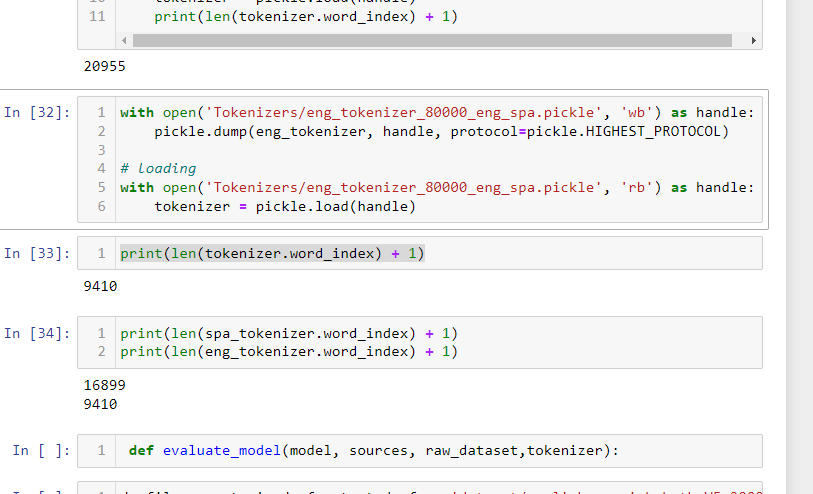

In [ ]:
 def evaluate_model(model, sources, raw_dataset,tokenizer):

In [ ]:
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-VF-20000.txt', 'dataset/english-spanish-train-VF-20000.txt','dataset/english-spanish-test-VF-20000.txt'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

In [18]:
spa_tokenizer = create_tokenizer(dataset[:,1] )
spa_vocab_size = len(spa_tokenizer.word_index) + 1
spa_length = max_length(dataset[:,1])
print(spa_length)

42


In [19]:
eng_tokenizer = create_tokenizer(dataset[:,0] )
eng_vocab_size = len(eng_tokenizer.word_index) + 1
eng_length = max_length(dataset[:,0])
print(spa_length)

42


In [ ]:
trainX = encode_sequence(eng_tokeni )

In [9]:
from fit_model import *

In [10]:
from pickle import load
from pickle import dump
from numpy.random import rand
from numpy.random import shuffle

In [11]:
# load a clean dataset
def load_clean_sentences(filename):
	return load(open(filename, 'rb'))

# save a list of clean sentences to file
def save_clean_data(sentences, filename):
	dump(sentences, open(filename, 'wb'))
	print('Saved: %s' % filename)

# load dataset
raw_dataset = load_clean_sentences('spanish-english-clean-3.txt')
dataset_number_of_samples = raw_dataset.shape[0]
print(dataset_number_of_samples)

# reduce dataset size
n_sentences = 50000

# random shuffle
shuffle(raw_dataset)

dataset = raw_dataset[:n_sentences, :]

# split into train/test
print(dataset.shape[0])

index_80=int(dataset.shape[0]*0.8)
train, test = dataset[:index_80], dataset[index_80:]
print(len(train),len(test))
# save
save_clean_data(dataset, 'dataset/english-spanish-both-VF-50000-2.txt')
save_clean_data(train, 'dataset/english-spanish-train-VF-50000-2.txt')
save_clean_data(test, 'dataset/english-spanish-test-VF-50000-2.txt')

117788
50000
40000 10000
Saved: dataset/english-spanish-both-VF-50000-2.txt
Saved: dataset/english-spanish-train-VF-50000-2.txt
Saved: dataset/english-spanish-test-VF-50000-2.txt


In [30]:
def define_model_1(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
	model = Sequential()
	model.add(Embedding(src_vocab, n_units, input_length=src_timesteps, mask_zero=True)) 
	model.add(Bidirectional(GRU(n_units)))
	model.add(RepeatVector(tar_timesteps))
	model.add(Bidirectional(GRU(n_units, return_sequences=True)))
	model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
	return model
    
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-VF-50000-2.txt', 'dataset/english-spanish-train-VF-50000-2.txt','dataset/english-spanish-test-VF-50000-2.txt'
units = 128
learning_rate = 0.001
loss_func='sparse_categorical_crossentropy'
epochs = 100
batch_size=32
model_save_file_name='Models/best_model-VF-50000-2.h5'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model_history_save_file_name ='model_history/best_model-VF-50000-2.npy'
best_model = define_model_1(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(best_model,loss_func,learning_rate)
plot_model(best_model, to_file='model_images/best_model-VF-50000-2.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, best_model, model_save_file_name,model_history_save_file_name)
graph_loss_vs_epochs(best_model.history, 'loss_vs_epochs_images/best_model-VF-50000-2.png', 'best_model-VF-50000-2')

9410 16899 34 36
(40000, 34) (40000, 36) (10000, 34) (10000, 36)
(40000, 34) (40000, 36) (10000, 34) (10000, 36)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 34, 128)           1204480   
                                                                 
 bidirectional_4 (Bidirectio  (None, 256)              198144    
 nal)                                                            
                                                                 
 repeat_vector_2 (RepeatVect  (None, 36, 256)          0         
 or)                                                             
                                                                 
 bidirectional_5 (Bidirectio  (None, 36, 256)          296448    
 nal)                                                            
                                                                 
 time_d

KeyboardInterrupt: 

In [ ]:
# it started 5:29  

# el de arriba es el que esta corriendoo

In [ ]:
def define_model_1(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
	model = Sequential()
	model.add(Embedding(src_vocab, n_units, input_length=src_timesteps, mask_zero=True)) 
	model.add(Bidirectional(GRU(n_units)))
	model.add(RepeatVector(tar_timesteps))
	model.add(Bidirectional(GRU(n_units, return_sequences=True)))
	model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
	return model
    
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-VF-50000.txt', 'dataset/english-spanish-train-VF-50000.txt','dataset/english-spanish-test-VF-50000.txt'
units = 128
learning_rate = 0.001
loss_func='sparse_categorical_crossentropy'
epochs = 100
batch_size=32
model_save_file_name='Models/best_model-VF-50000.h5'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model_history_save_file_name ='model_history/best_model-VF-50000.npy'
best_model = define_model_1(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(best_model,loss_func,learning_rate)
plot_model(best_model, to_file='model_images/best_model-VF-50000.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, best_model, model_save_file_name,model_history_save_file_name)
graph_loss_vs_epochs(best_model.history, 'loss_vs_epochs_images/best_model-VF-50000.png', 'best_model-VF-50000')

9369 16821 31 42
(40000, 31) (40000, 42) (10000, 31) (10000, 42)
(40000, 31) (40000, 42) (10000, 31) (10000, 42)
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 31, 128)           1199232   
                                                                 
 bidirectional_16 (Bidirecti  (None, 256)              198144    
 onal)                                                           
                                                                 
 repeat_vector_8 (RepeatVect  (None, 42, 256)          0         
 or)                                                             
                                                                 
 bidirectional_17 (Bidirecti  (None, 42, 256)          296448    
 onal)                                                           
                                                                 
 time_d

In [ ]:
# empezo 8:26

In [40]:
from fit_model import *
def define_model_1(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
	model = Sequential()
	model.add(Embedding(src_vocab, n_units, input_length=src_timesteps, mask_zero=True)) 
	model.add(Bidirectional(GRU(n_units)))
	model.add(RepeatVector(tar_timesteps))
	model.add(Bidirectional(GRU(n_units, return_sequences=True)))
	model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
	return model
    
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-VF.txt', 'dataset/english-spanish-train-VF.txt','dataset/english-spanish-test-VF.txt'
units = 128
learning_rate = 0.001
loss_func='sparse_categorical_crossentropy'
epochs = 100
batch_size=32
model_save_file_name='Models/best_model-VF.h5'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model_history_save_file_name ='model_history/best_model-VF.npy'
best_model = define_model_1(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(best_model,loss_func,learning_rate)
plot_model(best_model, to_file='model_images/best_model-VF.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, best_model, model_save_file_name,model_history_save_file_name)
graph_loss_vs_epochs(best_model.history, 'loss_vs_epochs_images/best_model-VF.png', 'best_model-VF')

12066 22997 42 44
(80000, 42) (80000, 44) (20000, 42) (20000, 44)
(80000, 42) (80000, 44) (20000, 42) (20000, 44)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 42, 128)           1544448   
                                                                 
 bidirectional_14 (Bidirecti  (None, 256)              198144    
 onal)                                                           
                                                                 
 repeat_vector_7 (RepeatVect  (None, 44, 256)          0         
 or)                                                             
                                                                 
 bidirectional_15 (Bidirecti  (None, 44, 256)          296448    
 onal)                                                           
                                                                 
 time_

KeyboardInterrupt: 

In [ ]:
# empezo 12:25 , 8:25 ---> 7 epoch 
# 

In [ ]:
def define_model_1(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
	model = Sequential()
	model.add(Embedding(src_vocab, n_units, input_length=src_timesteps, mask_zero=True)) 
	model.add(Bidirectional(GRU(n_units)))
	model.add(RepeatVector(tar_timesteps))
	model.add(Bidirectional(GRU(n_units, return_sequences=True)))
	model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
	return model
    
ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-100000.txt', 'dataset/english-spanish-train-100000.txt','dataset/english-spanish-test-100000.txt'
units = 128
learning_rate = 0.001
loss_func='sparse_categorical_crossentropy'
epochs = 100
batch_size=32
model_save_file_name='Models/best_model-100000.h5'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model_history_save_file_name ='model_history/best_model-100000.npy'
best_model = define_model_1(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(best_model,loss_func,learning_rate)
plot_model(best_model, to_file='model_images/best_model-100000.png', show_shapes=True)
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, best_model, model_save_file_name,model_history_save_file_name)
graph_loss_vs_epochs(best_model.history, 'loss_vs_epochs_images/best_model-100000.png', 'best_model-100000')

In [ ]:
# empeso 9:36 pm , primer epoch 11:30